In [1]:
# https://medium.com/towards-data-science/matplotlib-tips-to-instantly-improve-your-data-visualizations-according-to-storytelling-with-8e75601b38cb

# text and annotation
# https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html 

# Story telling with Data
# https://github.com/empathy87/storytelling-with-data

# cosine_similarity
# https://medium.com/analytics-vidhya/netflix-movie-recommendation-system-using-nlp-ca5dd0fe299a

# EDA
# https://github.com/hnawaz007/pythondataanalysis/blob/main/EDA/Exploratory%20Data%20Analysis%20Using%20Python.ipynb

## Introduction


This case study is using 3 tables containing information related to customers, products, sales opportunities and other facts in the historical sales pipeline in the US market between July 2019 to July 2020. 
***

### Objective

In this case study, the goal is to analyze historical data and help business answer the following questions:
-	Which products should the company focus on going forward? 
-	Which customers/opportunities to focus on in the future?
-	Where has the client seen the most success?


To analyze historical data, this notebook includes:

- Data wrangling: Drop duplicates and less useful columns; Check null/missing values; Convert data types; Remove outliers;  

- Exploratory data analysis (EDA) with data visualization

- Built Machine learning random forest model to understand influential factors for sales opportunity
 

*** 

### Data

The data is available as three CSV files:

    - `CustomerOpportunity.csv`: A historical sales opportunity table has 550,857 rows and 23 columns
    - `ProductMapping.csv`: map 'product_category4_id'  to `CustomerOpportunity.csv`
    - `BaseCustomer.csv`: contains industry, region and other information

## Sourcing and Loading Data

### Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date, timedelta
import os

%matplotlib inline
#plt.style.use('ggplot')

pd.set_option('max_columns', 30)
plt.rcParams.update(plt.rcParamsDefault)
sns.set()
import warnings

warnings.filterwarnings('ignore')

### Load the data 

In [2]:
# read data
opportunity = pd.read_csv('CustomerOpportunity.csv', encoding='utf-8')

# check the first few rows of data to identify the features
opportunity.head()

OPPORTUNITY_OPEN_CLOSED_INDICATOR PHASE_NAME PURSUIT_START_DATE  \
0                            CLOSED  Abandoned          3/13/2018   
1                              OPEN    phase 5          3/13/2018   
2                              OPEN    phase 5          3/13/2018   
3                              OPEN    phase 5          3/13/2018   
4                              OPEN    phase 5          3/13/2018   

  PROJECT_START_DATE PROJECT_END_DATE PERIOD_WON_LOSS_ABANDONED  \
0          10/1/2019         4/2/2020            Period 04 2020   
1           6/3/2019        12/2/2019                       NaN   
2          10/1/2019         4/2/2020                       NaN   
3           6/3/2019        12/2/2019                       NaN   
4           3/4/2019        10/1/2019                       NaN   

  DATE_WON_LOSS_ABANDONED PRIORITY    customer  Product_Category4_id  \
0               8/30/2019      NaN  24031560.0                1878.0   
1                     NaN      NaN  24031560.0                1878.0   
2                     NaN      NaN  24031560.0                1878.0   
3                     NaN      NaN  24031560.0                1878.0   
4                     NaN      NaN  24031560.0                1878.0   

  Product_Category2_text Product_Category3_text  PURSUIT_LEADER  \
0             category68         sub category91         22241.0   
1             category68         sub category91         22241.0   
2             category68         sub category91         22241.0   
3             category68         sub category91         22241.0   
4             category68         sub category91         22241.0   

  BUYER_ROLE_DESC CURRENCY  PROBABILITY_PRC  WEIGHTED_Sales  Total_Sales  \
0             NaN      USD                0             0.0       550000   
1             NaN      USD               25        137500.0       550000   
2             NaN      USD               25        137500.0       550000   
3             NaN      USD               25        137500.0       550000   
4             NaN      USD               25        137500.0       550000   

  STRATEGIC_OPPORTUNITY  SNAPSHOT_FY  SNAPSHOT_FP  \
0                   NaN         2020            4   
1                   NaN         2019           11   
2                   NaN         2020            3   
3                   NaN         2019           12   
4                   NaN         2019            9   

   SNAPSHOT_FISCAL_YEAR_PERIOD OPPORTUNITY_ID  
0                      2020004       MO-28949  
1                      2019011       MO-28949  
2                      2020003       MO-28949  
3                      2019012       MO-28949  
4                      2019009       MO-28949

In [3]:
opportunity.shape

(550857, 23)

In [4]:
# Get a summary of the opportunity dataset and check data types
opportunity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550857 entries, 0 to 550856
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   OPPORTUNITY_OPEN_CLOSED_INDICATOR  550857 non-null  object 
 1   PHASE_NAME                         550857 non-null  object 
 2   PURSUIT_START_DATE                 550857 non-null  object 
 3   PROJECT_START_DATE                 313496 non-null  object 
 4   PROJECT_END_DATE                   301941 non-null  object 
 5   PERIOD_WON_LOSS_ABANDONED          74452 non-null   object 
 6   DATE_WON_LOSS_ABANDONED            74452 non-null   object 
 7   PRIORITY                           18882 non-null   object 
 8   customer                           519395 non-null  float64
 9   Product_Category4_id               518548 non-null  float64
 10  Product_Category2_text             542149 non-null  object 
 11  Product_Category3_text             5295

In [6]:
# Change column headers to lowercase
opportunity.rename(columns={
    'Product_Category2_text': 'Product_Category2_id',
    'Product_Category3_text': 'Product_Category3_id',
},
                   inplace=True)

In [19]:
opportunity.columns = opportunity.columns.str.lower()

In [20]:
opportunity.columns 

Index(['opportunity_open_closed_indicator', 'phase_name', 'pursuit_start_date',
       'project_start_date', 'project_end_date', 'period_won_loss_abandoned',
       'date_won_loss_abandoned', 'priority', 'customer',
       'product_category4_id', 'product_category2_text',
       'product_category3_text', 'pursuit_leader', 'buyer_role_desc',
       'currency', 'probability_prc', 'weighted_sales', 'total_sales',
       'strategic_opportunity', 'snapshot_fy', 'snapshot_fp',
       'snapshot_fiscal_year_period', 'opportunity_id'],
      dtype='object')

In [21]:
# summary statistics
opportunity.describe().T

count          mean           std         min  \
customer                     519098.0  2.404328e+07  8.718907e+04  24000129.0   
product_category4_id         518289.0  4.123097e+03  4.002816e+03       126.0   
pursuit_leader               545569.0  1.149297e+04  1.177018e+04      5007.0   
probability_prc              550557.0  3.380770e+01  3.731485e+01         0.0   
weighted_sales               543112.0  3.547102e+05  2.371739e+06    -17820.0   
total_sales                  550557.0  1.245307e+06  8.833798e+06 -10000000.0   
snapshot_fy                  550557.0  2.019542e+03  4.982711e-01      2019.0   
snapshot_fp                  550557.0  6.861740e+00  3.673144e+00         1.0   
snapshot_fiscal_year_period  550557.0  2.019548e+06  4.951627e+02   2019007.0   

                                    25%         50%         75%           max  
customer                     24007173.0  24020920.5  24040950.0  2.450749e+07  
product_category4_id             1833.0      2823.0      5850.0  2.718300e+04  
pursuit_leader                   6599.0     10439.0     14295.0  4.500037e+06  
probability_prc                     0.0        25.0        75.0  1.000000e+02  
weighted_sales                      0.0     10000.0    105365.7  3.100000e+08  
total_sales                     50000.0    194665.0    667420.0  3.000000e+09  
snapshot_fy                      2019.0      2020.0      2020.0  2.020000e+03  
snapshot_fp                         4.0         7.0        10.0  1.300000e+01  
snapshot_fiscal_year_period   2019011.0   2020001.0   2020004.0  2.020007e+06

**Initial observations:**
    1. A lot of missing values
    2. All date fields need to be parsed as datetime data type
    3. Inconsistent data types: 'customer', 'pursuit_leader' and 'product_category4_id' need convert from float into strings
    4. The minimum weighted sales is negative?
    5. The maximum weighted sales is much larger than the 3rd quantile (75%)? outliers?

## Data cleaning, transformation and visualization 

### Check duplicates and missing values

In [22]:
## Check for duplicated rows
duplicateRows = opportunity[opportunity.duplicated()]
len(duplicateRows)

0

In [23]:
# drop duplicates and update the dataframe
opportunity.drop_duplicates(keep='first', inplace=True)

In [24]:
# count the number of missing values by column
missing = pd.concat([opportunity.isnull().sum(), 100 * opportunity.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by='count', ascending=False)

# `priority` and `strategic_opportunity` have the most missing values, at just over 96%!

count          %
priority                           531705  96.575831
strategic_opportunity              529737  96.218375
buyer_role_desc                    490521  89.095407
period_won_loss_abandoned          476195  86.493315
date_won_loss_abandoned            476195  86.493315
project_end_date                   248814  45.193141
project_start_date                 237259  43.094357
product_category4_id                32268   5.860974
customer                            31459   5.714031
product_category3_text              21316   3.871715
product_category2_text               8708   1.581671
weighted_sales                       7445   1.352267
pursuit_leader                       4988   0.905992
snapshot_fp                             0   0.000000
total_sales                             0   0.000000
snapshot_fy                             0   0.000000
snapshot_fiscal_year_period             0   0.000000
opportunity_open_closed_indicator       0   0.000000
probability_prc                         0   0.000000
currency                                0   0.000000
phase_name                              0   0.000000
pursuit_start_date                      0   0.000000
opportunity_id                          0   0.000000

### Convert date fields to datetime data type

In [25]:
# Convert `pursuit_start_date`,  `project_start_date`,  `project_end_date` to datetime data type
opportunity['pursuit_start_date'] = pd.to_datetime(
    opportunity.pursuit_start_date)
opportunity['project_start_date'] = pd.to_datetime(
    opportunity.project_start_date)
opportunity['project_end_date'] = pd.to_datetime(opportunity.project_end_date)

In [26]:
opportunity['project_days'] = (opportunity['project_end_date']-opportunity['pursuit_start_date']).dt.days

In [27]:
opportunity[opportunity['project_days']==33247]

opportunity_open_closed_indicator phase_name pursuit_start_date  \
129085                              OPEN    phase 3         2018-03-22   
129086                              OPEN    phase 3         2018-03-22   
129087                              OPEN    phase 3         2018-03-22   
129088                              OPEN    phase 3         2018-03-22   
129089                              OPEN    phase 3         2018-03-22   
129090                              OPEN    phase 3         2018-03-22   
129091                              OPEN    phase 3         2018-03-22   
129092                              OPEN    phase 3         2018-03-22   
129093                            CLOSED  Abandoned         2018-03-22   
129094                              OPEN    phase 3         2018-03-22   
129095                              OPEN    phase 3         2018-03-22   

       project_start_date project_end_date period_won_loss_abandoned  \
129085         2019-07-01       2109-04-01                       NaN   
129086         2019-07-01       2109-04-01                       NaN   
129087         2019-07-01       2109-04-01                       NaN   
129088         2019-01-01       2109-04-01                       NaN   
129089         2019-07-01       2109-04-01                       NaN   
129090         2019-07-01       2109-04-01                       NaN   
129091         2019-07-01       2109-04-01                       NaN   
129092         2019-07-01       2109-04-01                       NaN   
129093         2019-07-01       2109-04-01            Period 04 2020   
129094         2019-07-01       2109-04-01                       NaN   
129095         2019-01-01       2109-04-01                       NaN   

       date_won_loss_abandoned priority    customer  product_category4_id  \
129085                     NaN      NaN  24000954.0                5850.0   
129086                     NaN      NaN  24000954.0                5850.0   
129087                     NaN      NaN  24000954.0                5850.0   
129088                     NaN      NaN  24000954.0                5850.0   
129089                     NaN      NaN  24000954.0                5850.0   
129090                     NaN      NaN  24000954.0                5850.0   
129091                     NaN      NaN  24000954.0                5850.0   
129092                     NaN      NaN  24000954.0                5850.0   
129093                9/6/2019      NaN  24000954.0                5844.0   
129094                     NaN      NaN  24000954.0                5850.0   
129095                     NaN      NaN  24000954.0                5850.0   

       product_category2_text product_category3_text  pursuit_leader  \
129085             category50        sub category180          5510.0   
129086             category50        sub category180          5510.0   
129087             category50        sub category180          5510.0   
129088             category50        sub category180          5510.0   
129089             category50        sub category180          5510.0   
129090             category50        sub category180          5510.0   
129091             category50        sub category180          5510.0   
129092             category50        sub category180          5510.0   
129093             category50        sub category180          5510.0   
129094             category50        sub category180          5510.0   
129095             category50        sub category180          5510.0   

       buyer_role_desc currency  probability_prc  weighted_sales  total_sales  \
129085             NaN      USD               10         10000.0       100000   
129086             NaN      USD               10         10000.0       100000   
129087             NaN      USD               10         10000.0       100000   
129088             NaN      USD               10         10000.0       100000   
129089             NaN      USD               10         1

In [28]:
# opportunity[opportunity['opportunity_id'] == 'MO-31093']

In [29]:
# opportunity['project_end_date'].max() 
# correct '2109-04-01'

opportunity.loc[opportunity['project_end_date'] == '2109-04-01', 'project_end_date'] = '2019-04-01'

In [30]:
opportunity[opportunity['project_end_date'] < opportunity['project_start_date']][['project_start_date', 'project_end_date']]

project_start_date project_end_date
7810           2019-03-24       2019-03-22
16334          2019-06-27       2018-10-31
16335          2019-06-27       2018-10-31
16336          2019-06-27       2018-10-31
16337          2019-06-27       2018-10-31
...                   ...              ...
535378         2019-01-16       2018-09-20
535379         2019-01-16       2018-09-20
535380         2019-01-16       2018-09-20
535381         2019-01-16       2018-09-20
535382         2019-01-16       2018-09-20

[411 rows x 2 columns]

In [31]:
opportunity[(opportunity['project_start_date'].dt.year > 2020)] 

opportunity_open_closed_indicator phase_name pursuit_start_date  \
2346                                OPEN    phase 7         2019-01-14   
2347                                OPEN    phase 7         2019-01-14   
2348                                OPEN    phase 7         2019-01-14   
2349                                OPEN    phase 7         2019-01-14   
2350                                OPEN    phase 7         2019-01-14   
...                                  ...        ...                ...   
550739                              OPEN    phase 1         2019-10-14   
550740                              OPEN    phase 1         2019-10-14   
550741                              OPEN    phase 1         2019-10-14   
550797                              OPEN    phase 7         2018-10-01   
550814                              OPEN    phase 4         2019-12-06   

       project_start_date project_end_date period_won_loss_abandoned  \
2346           2021-07-16       2022-07-15                       NaN   
2347           2021-07-16       2022-07-15                       NaN   
2348           2021-07-16       2022-07-15                       NaN   
2349           2021-07-16       2022-07-15                       NaN   
2350           2021-07-16       2022-07-15                       NaN   
...                   ...              ...                       ...   
550739         2022-05-09       2025-05-08                       NaN   
550740         2022-05-09       2025-05-08                       NaN   
550741         2022-05-09       2025-05-08                       NaN   
550797         2021-01-29       2022-01-28                       NaN   
550814         2021-06-01       2022-05-27                       NaN   

       date_won_loss_abandoned priority    customer  product_category4_id  \
2346                       NaN      NaN  24027375.0                2010.0   
2347                       NaN      NaN  24027375.0                2010.0   
2348                       NaN      NaN  24027375.0                2010.0   
2349                       NaN      NaN  24027375.0                2010.0   
2350                       NaN      NaN  24027375.0                2010.0   
...                        ...      ...         ...                   ...   
550739                     NaN      NaN  24033501.0                1794.0   
550740                     NaN      NaN  24033501.0                1794.0   
550741                     NaN      NaN  24033501.0                1794.0   
550797                     NaN      NaN  24017412.0                2079.0   
550814                     NaN      NaN  24003402.0                1818.0   

       product_category2_text product_category3_text  pursuit_leader  \
2346               category51          sub category8         14281.0   
2347               category51          sub category8         14281.0   
2348               category51          sub category8         14281.0   
2349               category51          sub category8         14281.0   
2350               category51          sub category8         14281.0   
...                       ...                    ...             ...   
550739              category8        sub category157         14324.0   
550740              category8        sub category157         14324.0   
550741              category8        sub category157         14324.0   
550797             category51        sub category152         13017.0   
550814              category8        sub category135         11294.0   

       buyer_role_desc currency  probability_prc  weighted_sales  total_sales  \
2346               NaN      USD               90       1147476.6      1274974   
2347               NaN      USD               90       1147476.6      1274974   
2348               NaN      USD               90       1147476.6      1274974   
2349               NaN      USD               90       1147476.6      1274974   
2350               NaN      USD               90       114

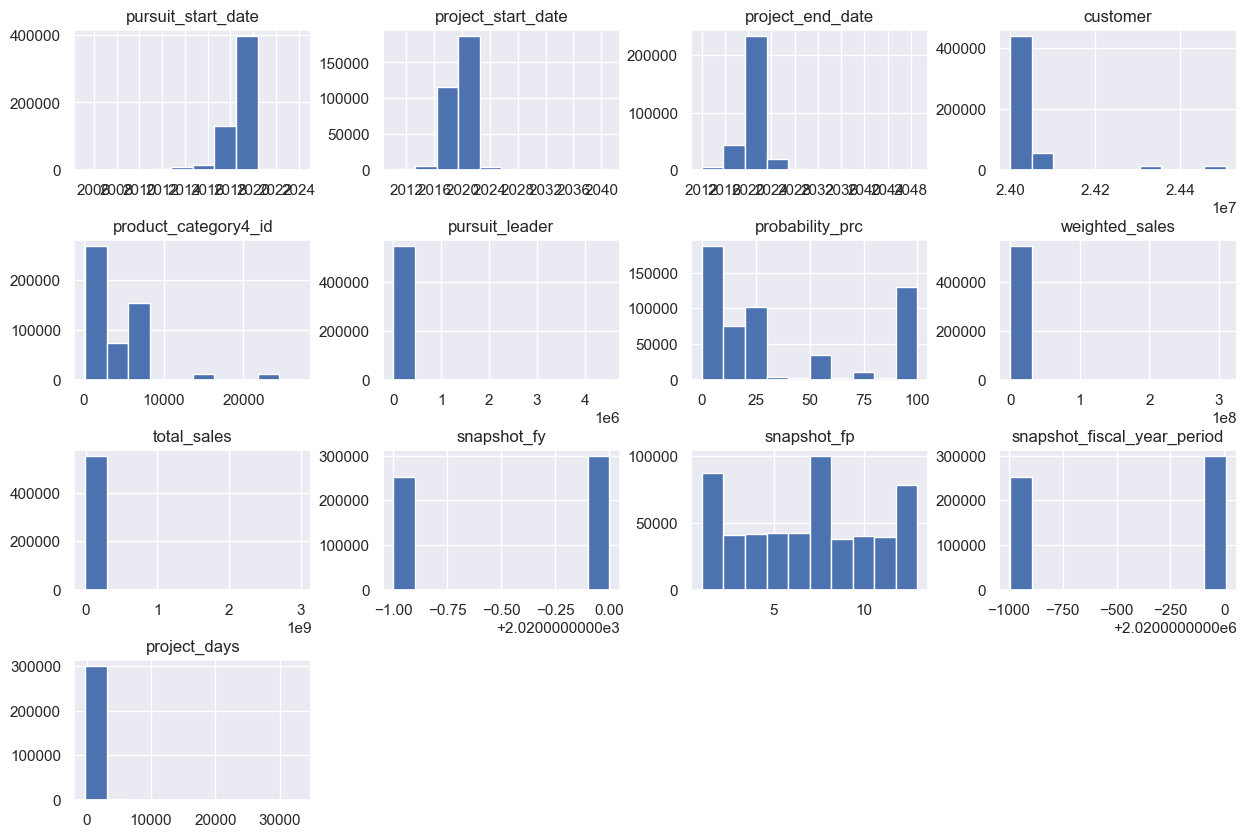

In [18]:
opportunity.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5); # with an argument hspace=0.5 to adjust the spacing
plt.show();

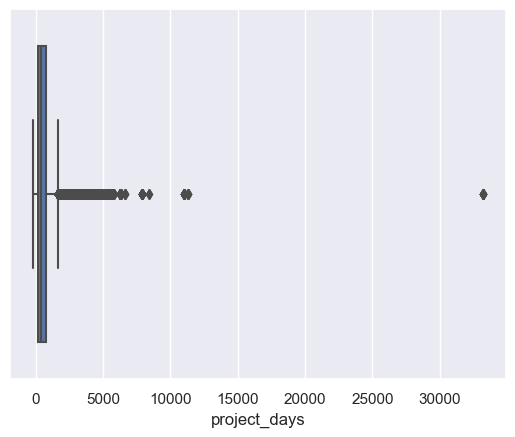

In [32]:
sns.boxplot(x=opportunity['project_days'])
plt.show();

In [33]:
# convert `snapshot_fiscal_year_period` to datetime data type
opportunity['snapshot_fiscal_year_period'] = opportunity[
    'snapshot_fiscal_year_period'].astype(str).str[:4] + opportunity['snapshot_fiscal_year_period'].astype(str).str[-2:]

# invalid date '201913' - Need to find the root cause later
# df_201913 = opportunity.loc[opportunity['snapshot_fiscal_year_period'] == '201913']
# df_201913.head()

# replace the invalid value '2019013' wtih '202001'
opportunity.loc[opportunity['snapshot_fiscal_year_period'] == '201913',
                'snapshot_fiscal_year_period'] = '201912'


opportunity['snapshot_fiscal_year_period'] = pd.to_datetime(
    opportunity['snapshot_fiscal_year_period'], format="%Y%m")

# pd.to_datetime(opportunity['snapshot_fiscal_year_period'], format="%Y%m").dt.strftime('%Y-%m')

In [34]:
opportunity['Year'] = opportunity['snapshot_fiscal_year_period'].dt.year

opportunity['Year-month'] = opportunity['snapshot_fiscal_year_period'].dt.strftime("%Y-%m")

In [35]:
# Convert `date_won_loss_abandoned`, `period_won_loss_abandoned` to datetime data type
opportunity['date_won_loss_abandoned'] = pd.to_datetime(opportunity.date_won_loss_abandoned)

opportunity['period_won_loss_abandoned'] = pd.to_datetime(
    (opportunity.period_won_loss_abandoned.astype(str).str[-4:] +
     opportunity.period_won_loss_abandoned.astype(str).str[7:9]).replace( {'201913': '201912'}), format="%Y%m")

opportunity[['date_won_loss_abandoned', 'period_won_loss_abandoned']].nunique()

date_won_loss_abandoned      392
period_won_loss_abandoned     13
dtype: int64

 `date_won_loss_abandoned` and `period_won_loss_abandoned` are totally different. To answer the question, we may need to consult with the client or other domain expert. They might know of good reasons for treating them differently. 

In [36]:
# drop less useful features for this analysis - 'date_won_loss_abandoned' and `period_won_loss_abandoned`
# drop 'snapshot_fy' and 'snapshot_fp'
# drop the 'currency' columns as it only contains one value

to_drop = [
    'date_won_loss_abandoned', 'period_won_loss_abandoned', 'currency',
    'snapshot_fy', 'snapshot_fp'
]
opportunity.drop(to_drop, axis=1, inplace=True)

### Convert 'customer', 'product_category4_id' and 'pursuit_leader' from numerical to categorical data type

In [37]:
opportunity['customer'] = opportunity['customer'].fillna(0).astype(int).astype(str)
opportunity['customer']

0         24031560
1         24031560
2         24031560
3         24031560
4         24031560
            ...   
550852    24021531
550853    24021531
550854    24021531
550855    24021531
550856    24021531
Name: customer, Length: 550557, dtype: object

In [38]:
opportunity['product_category4_id'] = opportunity['product_category4_id'].fillna(0).astype(int).astype(str)
opportunity['product_category4_id']

0         1878
1         1878
2         1878
3         1878
4         1878
          ... 
550852    3786
550853    3783
550854    3783
550855    3786
550856    3783
Name: product_category4_id, Length: 550557, dtype: object

In [39]:
opportunity['pursuit_leader'] = opportunity['pursuit_leader'].fillna(0).astype(int).astype(str)
opportunity['pursuit_leader']

0         22241
1         22241
2         22241
3         22241
4         22241
          ...  
550852     5511
550853     5511
550854     5511
550855     5511
550856     5511
Name: pursuit_leader, Length: 550557, dtype: object

In [40]:
# Use `select_dtypes` method to select columns of dtype 'object'
df = opportunity
cols = list(df.select_dtypes('object').columns) + list(
    df.select_dtypes(['datetime64[ns]']).columns) + list(
        df.select_dtypes(['int64']).columns) + list(
            df.select_dtypes(['float64']).columns)

dfo = df[cols]
dfo.head()

opportunity_open_closed_indicator phase_name priority  customer  \
0                            CLOSED  Abandoned      NaN  24031560   
1                              OPEN    phase 5      NaN  24031560   
2                              OPEN    phase 5      NaN  24031560   
3                              OPEN    phase 5      NaN  24031560   
4                              OPEN    phase 5      NaN  24031560   

  product_category4_id product_category2_text product_category3_text  \
0                 1878             category68         sub category91   
1                 1878             category68         sub category91   
2                 1878             category68         sub category91   
3                 1878             category68         sub category91   
4                 1878             category68         sub category91   

  pursuit_leader buyer_role_desc strategic_opportunity opportunity_id  \
0          22241             NaN                   NaN       MO-28949   
1          22241             NaN                   NaN       MO-28949   
2          22241             NaN                   NaN       MO-28949   
3          22241             NaN                   NaN       MO-28949   
4          22241             NaN                   NaN       MO-28949   

  Year-month pursuit_start_date project_start_date project_end_date  \
0    2020-04         2018-03-13         2019-10-01       2020-04-02   
1    2019-11         2018-03-13         2019-06-03       2019-12-02   
2    2020-03         2018-03-13         2019-10-01       2020-04-02   
3    2019-12         2018-03-13         2019-06-03       2019-12-02   
4    2019-09         2018-03-13         2019-03-04       2019-10-01   

  snapshot_fiscal_year_period  probability_prc  total_sales  Year  \
0                  2020-04-01                0       550000  2020   
1                  2019-11-01               25       550000  2019   
2                  2020-03-01               25       550000  2020   
3                  2019-12-01               25       550000  2019   
4                  2019-09-01               25       550000  2019   

   weighted_sales  project_days  
0             0.0         751.0  
1        137500.0         629.0  
2        137500.0         751.0  
3        137500.0         629.0  
4        137500.0         567.0

In [41]:
# Review the count of unique values by column
dfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550557 entries, 0 to 550856
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   opportunity_open_closed_indicator  550557 non-null  object        
 1   phase_name                         550557 non-null  object        
 2   priority                           18852 non-null   object        
 3   customer                           550557 non-null  object        
 4   product_category4_id               550557 non-null  object        
 5   product_category2_text             541849 non-null  object        
 6   product_category3_text             529241 non-null  object        
 7   pursuit_leader                     550557 non-null  object        
 8   buyer_role_desc                    60036 non-null   object        
 9   strategic_opportunity              20820 non-null   object        
 10  opportunity_id      

In [42]:
dfo[(dfo['opportunity_open_closed_indicator'].str.contains('OPEN')) & (dfo['phase_name'].str.contains('Lost'))]

opportunity_open_closed_indicator phase_name  \
17490                               OPEN       Lost   
19298                               OPEN       Lost   
19299                               OPEN       Lost   
19300                               OPEN       Lost   
19301                               OPEN       Lost   
...                                  ...        ...   
523806                              OPEN       Lost   
523811                              OPEN       Lost   
523812                              OPEN       Lost   
523815                              OPEN       Lost   
523816                              OPEN       Lost   

                               priority  customer product_category4_id  \
17490                               NaN  24016497                 1734   
19298   Restricted: GPS Sector Priority  24027375                 1629   
19299   Restricted: GPS Sector Priority  24027375                 1830   
19300   Restricted: GPS Sector Priority  24027375                  660   
19301   Restricted: GPS Sector Priority  24027375                 1734   
...                                 ...       ...                  ...   
523806                              NaN  24048879                 1125   
523811                              NaN  24048879                 1647   
523812                              NaN  24048879                 1125   
523815                              NaN  24048879                 1125   
523816                              NaN  24048879                 1647   

       product_category2_text product_category3_text pursuit_leader  \
17490              category21         sub category24           6899   
19298              category18        sub category116           6470   
19299               category8        sub category135           6470   
19300              category53         sub category11           6470   
19301              category21         sub category60           6470   
...                       ...                    ...            ...   
523806             category14          sub category2          14244   
523811             category18        sub category159          14244   
523812             category14          sub category2          14244   
523815             category14          sub category2          14244   
523816             category18        sub category159          14244   

       buyer_role_desc strategic_opportunity opportunity_id Year-month  \
17490              NaN                   NaN     MO-2705415    2019-08   
19298              NaN                   NaN      MO-377151    2020-05   
19299              NaN                   NaN      MO-377151    2020-05   
19300              NaN                   NaN      MO-377151    2020-05   
19301              NaN                   NaN      MO-377151    2020-05   
...                ...                   ...            ...        ...   
523806             NaN                   NaN     MO-2607735    2020-04   
523811             NaN                   NaN     MO-2607735    2020-03   
523812             NaN                   NaN     MO-2607735    2020-03   
523815             NaN                   NaN     MO-2607735    2020-07   
523816             NaN                   NaN     MO-2607735    2020-07   

       pursuit_start_date project_start_date project_end_date  \
17490          2018-10-09         2018-11-05       2019-01-18   
19298          2018-01-22         2019-10-01       2023-04-30   
19299          2018-01-22         2019-10-01       2023-04-30   
19300          2018-01-22         2019-10-01       2023-04-30   
19301          2018-01-22         2019-10-01       2023-04-30   
...                   ...                ...              ...   
523806         2018-07-26         2019-11-06       2024-06-30   
523811         2018-07-26         2019-11-06       2024-06-30   
523812         2018-07-26         2019-11-06       2024-06-30   
523815         2018-07-26         2020-02-03       2024-06-30   


In [44]:
# how many snapshots did each opportunity have in each phase ?
opportunity.groupby(['opportunity_id', 'phase_name']).size()

opportunity_id  phase_name
MO-220087       phase 1        1
MO-220089       Won            1
                phase 1        1
MO-220091       Won            1
                phase 1        1
                              ..
MO-39927        phase 1       14
MO-39945        phase 1       14
MO-39947        phase 1        1
MO-39963        phase 1        1
MO-39977        phase 1        1
Length: 160919, dtype: int64

In [45]:
# group the opportunity by id and phase
opportunity.groupby(['opportunity_id', 'phase_name']).agg(lambda x: len(x) >1)

opportunity_open_closed_indicator  \
opportunity_id phase_name                                      
MO-220087      phase 1                                 False   
MO-220089      Won                                     False   
               phase 1                                 False   
MO-220091      Won                                     False   
               phase 1                                 False   
...                                                      ...   
MO-39927       phase 1                                  True   
MO-39945       phase 1                                  True   
MO-39947       phase 1                                 False   
MO-39963       phase 1                                 False   
MO-39977       phase 1                                 False   

                           pursuit_start_date  project_start_date  \
opportunity_id phase_name                                           
MO-220087      phase 1                  False               False   
MO-220089      Won                      False               False   
               phase 1                  False               False   
MO-220091      Won                      False               False   
               phase 1                  False               False   
...                                       ...                 ...   
MO-39927       phase 1                   True                True   
MO-39945       phase 1                   True                True   
MO-39947       phase 1                  False               False   
MO-39963       phase 1                  False               False   
MO-39977       phase 1                  False               False   

                           project_end_date  priority  customer  \
opportunity_id phase_name                                         
MO-220087      phase 1                False     False     False   
MO-220089      Won                    False     False     False   
               phase 1                False     False     False   
MO-220091      Won                    False     False     False   
               phase 1                False     False     False   
...                                     ...       ...       ...   
MO-39927       phase 1                 True      True      True   
MO-39945       phase 1                 True      True      True   
MO-39947       phase 1                False     False     False   
MO-39963       phase 1                False     False     False   
MO-39977       phase 1                False     False     False   

                           product_category4_id  product_category2_text  \
opportunity_id phase_name                                                 
MO-220087      phase 1                    False                   False   
MO-220089      Won                        False                   False   
               phase 1                    False                   False   
MO-220091      Won                        False                   False   
               phase 1                    False                   False   
...                                         ...                     ...   
MO-39927       phase 1                     True                    True   
MO-39945       phase 1                     True                    True   
MO-39947       phase 1                    False                   False   
MO-39963       phase 1                    False                   False   
MO-39977       phase 1                    False                   False   

                           product_category3_text  pursuit_leader  \
opportunity_id phase_name                                           
MO-220087      phase 1                      False           False   
MO-220089      Won                          False           False   
               phase 1                      False           False   
MO-220091      Won                          False           False   
               phase 1            

In [46]:
# get levels for all variables - find the number of unique values by column
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending=False)
vn

VarName  LevelsCount
0   opportunity_open_closed_indicator            2
1                          phase_name           10
2                            priority            5
3                            customer        11898
4                product_category4_id          592
5              product_category2_text           64
6              product_category3_text          168
7                      pursuit_leader         4975
8                     buyer_role_desc           46
9               strategic_opportunity           75
10                     opportunity_id       104997
11                         Year-month           13
12                 pursuit_start_date         2612
13                 project_start_date         3016
14                   project_end_date         3576
15        snapshot_fiscal_year_period           13
16                    probability_prc           59
17                        total_sales        21712
18                               Year            2
19                     weighted_sales        15614
20                       project_days         2939

###  Categorical Variables 

In [47]:
# 'opportunity_open_closed_indicator' has 2 categories
dfo['opportunity_open_closed_indicator'].value_counts()

OPEN      476195
CLOSED     74362
Name: opportunity_open_closed_indicator, dtype: int64

In [48]:
dfo['opportunity_indicator'] = dfo['opportunity_open_closed_indicator'].map({'OPEN':1, 'CLOSED':0})

In [49]:
dfo.head()

opportunity_open_closed_indicator phase_name priority  customer  \
0                            CLOSED  Abandoned      NaN  24031560   
1                              OPEN    phase 5      NaN  24031560   
2                              OPEN    phase 5      NaN  24031560   
3                              OPEN    phase 5      NaN  24031560   
4                              OPEN    phase 5      NaN  24031560   

  product_category4_id product_category2_text product_category3_text  \
0                 1878             category68         sub category91   
1                 1878             category68         sub category91   
2                 1878             category68         sub category91   
3                 1878             category68         sub category91   
4                 1878             category68         sub category91   

  pursuit_leader buyer_role_desc strategic_opportunity opportunity_id  \
0          22241             NaN                   NaN       MO-28949   
1          22241             NaN                   NaN       MO-28949   
2          22241             NaN                   NaN       MO-28949   
3          22241             NaN                   NaN       MO-28949   
4          22241             NaN                   NaN       MO-28949   

  Year-month pursuit_start_date project_start_date project_end_date  \
0    2020-04         2018-03-13         2019-10-01       2020-04-02   
1    2019-11         2018-03-13         2019-06-03       2019-12-02   
2    2020-03         2018-03-13         2019-10-01       2020-04-02   
3    2019-12         2018-03-13         2019-06-03       2019-12-02   
4    2019-09         2018-03-13         2019-03-04       2019-10-01   

  snapshot_fiscal_year_period  probability_prc  total_sales  Year  \
0                  2020-04-01                0       550000  2020   
1                  2019-11-01               25       550000  2019   
2                  2020-03-01               25       550000  2020   
3                  2019-12-01               25       550000  2019   
4                  2019-09-01               25       550000  2019   

   weighted_sales  project_days  opportunity_indicator  
0             0.0         751.0                      0  
1        137500.0         629.0                      1  
2        137500.0         751.0                      1  
3        137500.0         629.0                      1  
4        137500.0         567.0                      1

In [50]:
groups = dfo.groupby('opportunity_open_closed_indicator')

idx = [x[0] for x in groups]
num_opportunity = [x[1]['opportunity_id'].nunique() for x in groups]

counts = sum([x[1]['opportunity_id'].nunique() for x in groups])
perc = [x / counts for x in num_opportunity]

byidx_df = pd.DataFrame({
    'opportunity_open_closed_indicator': idx,
    'Count': num_opportunity,
    'perc': perc
})

byidx_df

opportunity_open_closed_indicator  Count      perc
0                            CLOSED  67079  0.456898
1                              OPEN  79735  0.543102

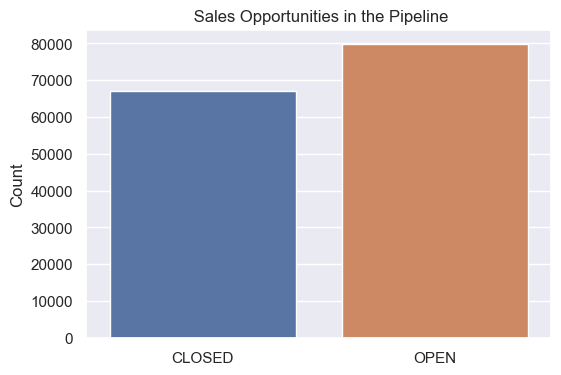

In [57]:
fig, ax = plt.subplots(figsize=(6,4))

sns.barplot(x='opportunity_open_closed_indicator',
            y='Count',
            data=byidx_df, ax=ax)
# ax.bar_label(ax.containers[-1], fmt='%.2f', label_type='center')
plt.xlabel('') 
plt.title(' Sales Opportunities in the Pipeline')
    
plt.show();

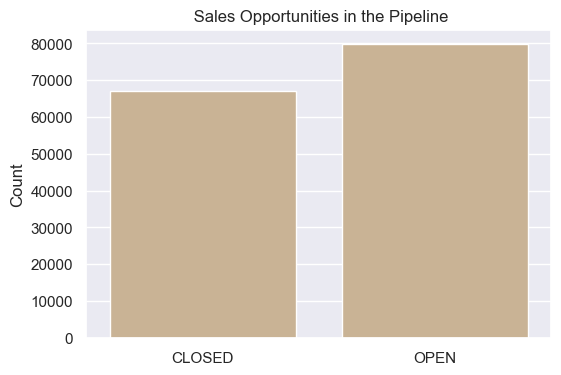

In [58]:
# create a simple monochrome barplot using Seaborn with a title as a starting point:
fig, ax = plt.subplots(1,1, figsize=(6,4))

sns.barplot(x='opportunity_open_closed_indicator',
            y='Count',
            data=byidx_df, color='tan')

# ax.bar_label(ax.containers[-1], fmt='%.2f', label_type='center')
# Add title
ax.set_xlabel('') 
ax.set_title(' Sales Opportunities in the Pipeline')
    
plt.show();

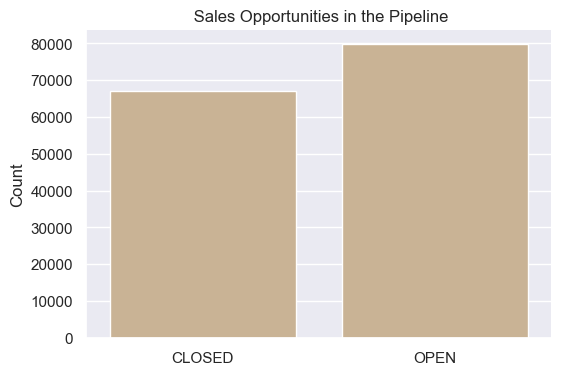

In [59]:
# create a simple monochrome barplot using Seaborn with a title as a starting point:
fig, ax = plt.subplots(1,1, figsize=(6,4))

sns.barplot(x='opportunity_open_closed_indicator',
            y='Count',
            data=byidx_df, color='tan')

# ax.bar_label(ax.containers[-1], fmt='%.2f', label_type='center')
# Add title
ax.set_xlabel('') 
ax.set_title(' Sales Opportunities in the Pipeline')

# remove cluter visual in plots
# Remove top and right spines
# remove the border, including the full x- and y-axis using ax.axis('off')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show();

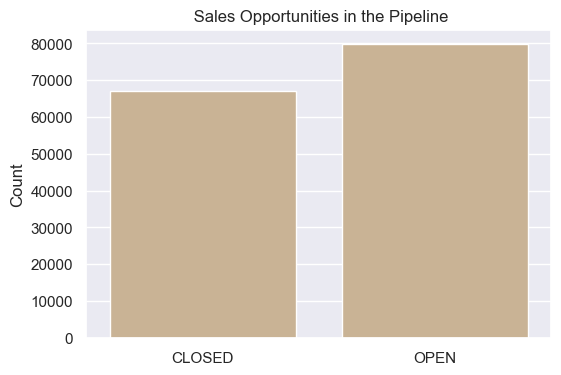

In [61]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

sns.barplot(x='opportunity_open_closed_indicator',
            y='Count',
            data=byidx_df, color='tan')

# ax.bar_label(ax.containers[-1], fmt='%.2f', label_type='center')
# Add title
ax.set_xlabel('') 
ax.set_title(' Sales Opportunities in the Pipeline')
# remove ticks from a  plot
# Remove ticks on x-axis
ax.tick_params(bottom = False)
plt.show();

In [62]:
# # simplify the phase names
dfo['phase_name'] = dfo['phase_name'].str.lstrip('phase ')
dfo.loc[dfo['phase_name'].str.contains('Abandoned'), 'phase_name'] = 'Lost'

In [63]:
dfo[(dfo['opportunity_open_closed_indicator'].str.contains('OPEN')) & (dfo['phase_name'].str.contains('Lost'))]

opportunity_open_closed_indicator phase_name  \
17490                               OPEN       Lost   
19298                               OPEN       Lost   
19299                               OPEN       Lost   
19300                               OPEN       Lost   
19301                               OPEN       Lost   
...                                  ...        ...   
523806                              OPEN       Lost   
523811                              OPEN       Lost   
523812                              OPEN       Lost   
523815                              OPEN       Lost   
523816                              OPEN       Lost   

                               priority  customer product_category4_id  \
17490                               NaN  24016497                 1734   
19298   Restricted: GPS Sector Priority  24027375                 1629   
19299   Restricted: GPS Sector Priority  24027375                 1830   
19300   Restricted: GPS Sector Priority  24027375                  660   
19301   Restricted: GPS Sector Priority  24027375                 1734   
...                                 ...       ...                  ...   
523806                              NaN  24048879                 1125   
523811                              NaN  24048879                 1647   
523812                              NaN  24048879                 1125   
523815                              NaN  24048879                 1125   
523816                              NaN  24048879                 1647   

       product_category2_text product_category3_text pursuit_leader  \
17490              category21         sub category24           6899   
19298              category18        sub category116           6470   
19299               category8        sub category135           6470   
19300              category53         sub category11           6470   
19301              category21         sub category60           6470   
...                       ...                    ...            ...   
523806             category14          sub category2          14244   
523811             category18        sub category159          14244   
523812             category14          sub category2          14244   
523815             category14          sub category2          14244   
523816             category18        sub category159          14244   

       buyer_role_desc strategic_opportunity opportunity_id Year-month  \
17490              NaN                   NaN     MO-2705415    2019-08   
19298              NaN                   NaN      MO-377151    2020-05   
19299              NaN                   NaN      MO-377151    2020-05   
19300              NaN                   NaN      MO-377151    2020-05   
19301              NaN                   NaN      MO-377151    2020-05   
...                ...                   ...            ...        ...   
523806             NaN                   NaN     MO-2607735    2020-04   
523811             NaN                   NaN     MO-2607735    2020-03   
523812             NaN                   NaN     MO-2607735    2020-03   
523815             NaN                   NaN     MO-2607735    2020-07   
523816             NaN                   NaN     MO-2607735    2020-07   

       pursuit_start_date project_start_date project_end_date  \
17490          2018-10-09         2018-11-05       2019-01-18   
19298          2018-01-22         2019-10-01       2023-04-30   
19299          2018-01-22         2019-10-01       2023-04-30   
19300          2018-01-22         2019-10-01       2023-04-30   
19301          2018-01-22         2019-10-01       2023-04-30   
...                   ...                ...              ...   
523806         2018-07-26         2019-11-06       2024-06-30   
523811         2018-07-26         2019-11-06       2024-06-30   
523812         2018-07-26         2019-11-06       2024-06-30   
523815         2018-07-26         2020-02-03       2024-06-30   


In [64]:
dfo['phase_name'].str.contains('Lost').sum()

29161

In [65]:
# group by 'phase_name'
groups = dfo.groupby('phase_name')

idx = [x[0] for x in groups]
num_opportunity = [x[1]['opportunity_id'].nunique() for x in groups]

counts = sum([x[1]['opportunity_id'].nunique() for x in groups])
perc = [x *100 / counts for x in num_opportunity]

byphase_df = pd.DataFrame({
    'phase_name': idx,
    'Count of opportunities': num_opportunity,
    'Perc': perc
})
byphase_df

phase_name  Count of opportunities       Perc
0          1                   30192  18.762817
1          2                    6296   3.912649
2          3                   12963   8.055856
3          4                   13086   8.132294
4          5                   11972   7.439999
5          6                    3186   1.979940
6          7                   16115  10.014666
7       Lost                   26459  16.442945
8        Won                   40645  25.258834

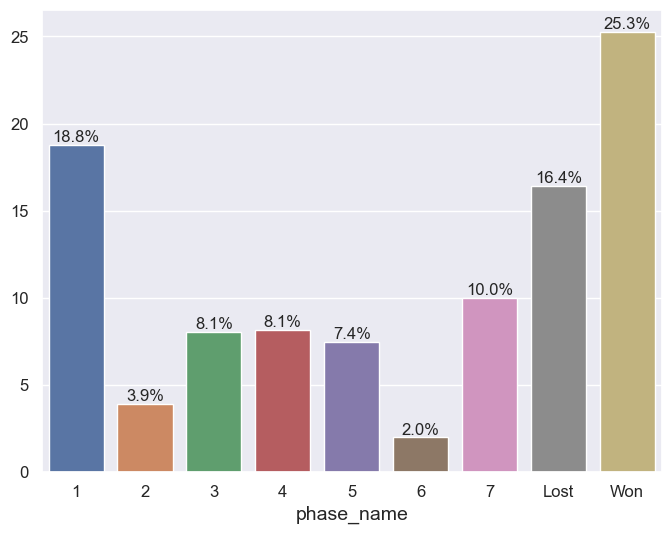

In [66]:
#
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='phase_name', y='Perc', data=byphase_df)

ax.bar_label(ax.containers[0], fmt='%.1f%%' )
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.0f%%')
    
ax.set_ylabel('')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('phase_name', size=14)
# plt.savefig('images\cnt_phase.png')
plt.show();

# ax = sns.barplot(x='Day', y='Customers (%)', hue='Time', data=df) 

### De-emphasize

- to change the colors of the less important parts of a plot
- Push necessary, but non-message-impacting items to the background. […] Light grey works well for this.”— Cole Nussbaumer Knaflic in “Storytelling with Data”

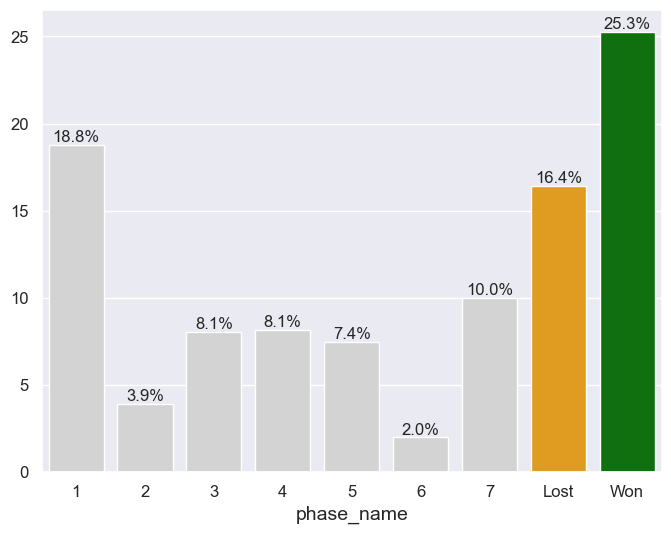

In [70]:
fig, ax = plt.subplots(1,1, figsize=(8, 6))
# Define colors of individual bars
custom_colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'orange', 'green']

sns.barplot(x='phase_name', y='Perc', data=byphase_df, palette = custom_colors)

ax.bar_label(ax.containers[0], fmt='%.1f%%' )
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.0f%%')
    
ax.set_ylabel('')
ax.set_xlabel('phase_name', size=14)

plt.xticks(size=12)
plt.yticks(size=12)

# plt.savefig('images\cnt_phase.png')
plt.show();

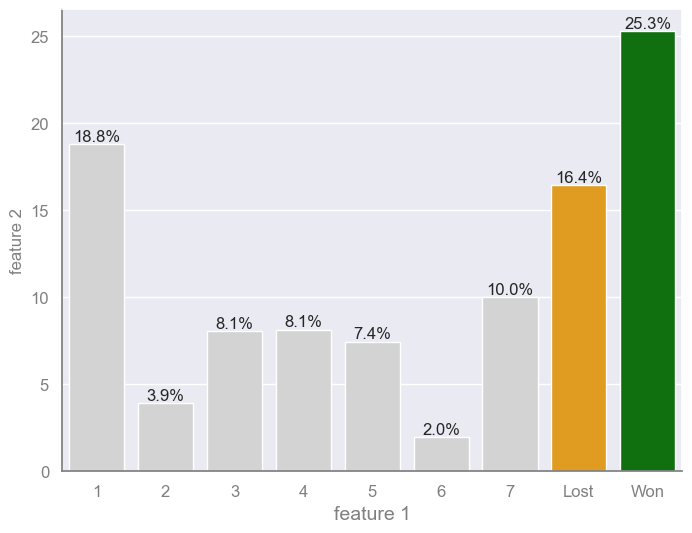

In [71]:
# to mute the colors of the x- and y-axis

fig, ax = plt.subplots(1,1, figsize=(8, 6))
# Define colors of individual bars
custom_colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'orange', 'green']

sns.barplot(x='phase_name', y='Perc', data=byphase_df, palette = custom_colors)

ax.bar_label(ax.containers[0], fmt='%.1f%%' )
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.0f%%')

plt.xticks(size=12)
plt.yticks(size=12)

# Mute colors of labels
ax.set_ylabel('', color = 'grey')
ax.set_xlabel('phase_name', color = 'grey', size=14)


# Mute colors of spines
ax.spines['left'].set_color('grey')   
ax.spines['bottom'].set_color('grey')

# Mute colors of ticks
ax.tick_params(colors = 'grey')

# plt.savefig('images\cnt_phase.png')
plt.show();

### Text Is Your Friend: Adding Annotations

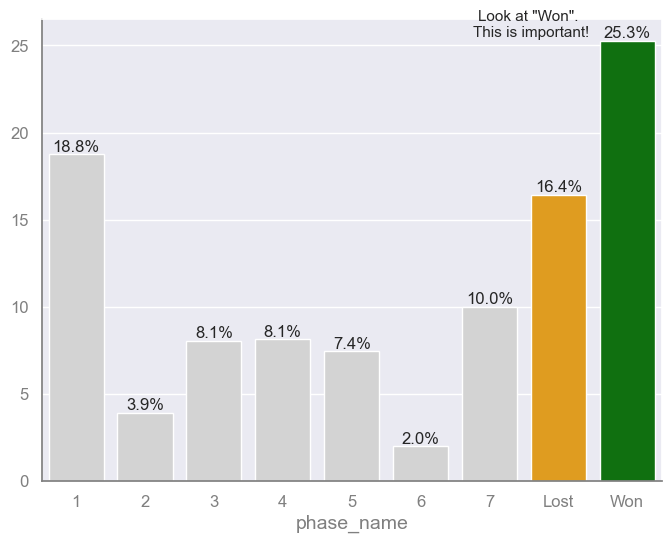

In [100]:
#  add text to your data visualizations to highlight the key takeaways
#  “If there is a conclusion you want your audience to reach, state it in words.” 
# Add text annotations , take the text and its location in the plot as arguments

fig, ax = plt.subplots(1,1, figsize=(8, 6))
# Define colors of individual bars
custom_colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'orange', 'green']

sns.barplot(x='phase_name', y='Perc', data=byphase_df, palette = custom_colors)

ax.bar_label(ax.containers[0], fmt='%.1f%%' )
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.0f%%')

plt.xticks(size=12)
plt.yticks(size=12)

# Mute colors of labels
ax.set_ylabel('', color = 'grey')
ax.set_xlabel('phase_name', color = 'grey', size=14)


# Mute colors of spines
ax.spines['left'].set_color('grey')   
ax.spines['bottom'].set_color('grey')

# Mute colors of ticks
ax.tick_params(colors = 'grey')


# xy: the point to annotate — a.k.a. where your arrow will point towards
# xytext: where to place the text (and where the arrow ends)
# arrowprops = {'arrowstyle' : '->'}: what the arrow should look like
ax.annotate('Look at "Won". \nThis is important!',
             xy = (6.6, 25.5), 
              ha = 'center', # ha
              fontsize = 11,
           )
plt.show();

### # To add the value to every individual bar, 

In [101]:
# Annotate bar chart with values
for bar in ax.patches:
    ax.annotate(int(bar.get_height()),
                xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha = 'center', 
                va = 'center',
                xytext = (0, 8),
                textcoords = 'offset points'
                )
    
# For every bar, you can use the get_height(), get_width(), and get_x() methods to place the value above the bar.

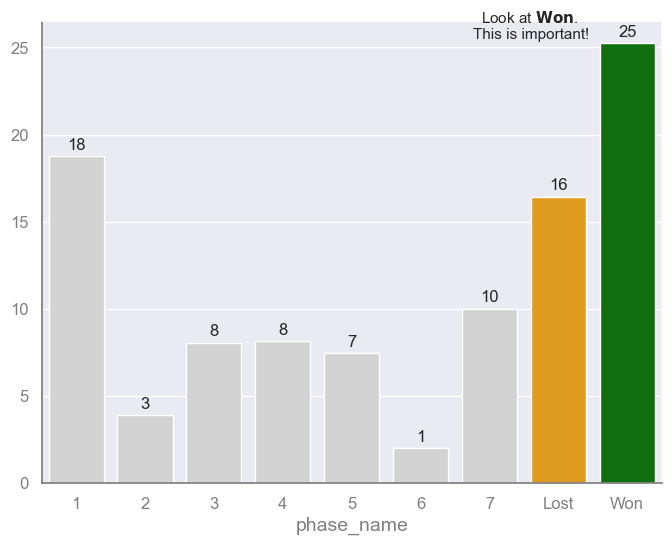

In [117]:
#

fig, ax = plt.subplots(1,1, figsize=(8, 6))
# Define colors of individual bars
custom_colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'orange', 'green']

sns.barplot(x='phase_name', y='Perc', data=byphase_df, palette = custom_colors)

# ax.bar_label(ax.containers[0], fmt='%.1f%%' )


plt.xticks(size=12)
plt.yticks(size=12)

# Mute colors of labels
ax.set_ylabel('', color = 'grey')
ax.set_xlabel('phase_name', color = 'grey', size=14)


# Mute colors of spines
ax.spines['left'].set_color('grey')   
ax.spines['bottom'].set_color('grey')

# Mute colors of ticks
ax.tick_params(colors = 'grey')


# xy: the point to annotate — a.k.a. where your arrow will point towards
# xytext: where to place the text (and where the arrow ends)
# arrowprops = {'arrowstyle' : '->'}: what the arrow should look like
ax.annotate('Look at $\\bf{Won}$. \nThis is important!',
             xy = (6.6, 25.5), 
              ha = 'center', # ha
              fontsize = 11,
           )
# Annotate bar chart with values
for bar in ax.patches:
    ax.annotate(int(bar.get_height()),
                xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha = 'center', 
                va = 'center',
                xytext = (0, 8),
                textcoords = 'offset points'
                )

plt.show();

### Emphasize

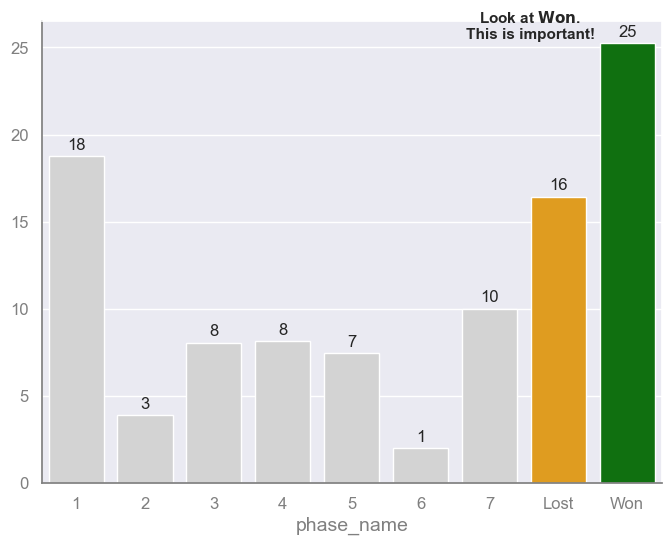

In [122]:
# To guide your audience's attention to what you want them to see
# To make whole or parts of text bold in Matplotlib annotation
# If only highlight part of annotation, use $\\bf{}$ in string and place the text to be emphasized in the curly brackets. 

fig, ax = plt.subplots(1,1, figsize=(8, 6))
# Define colors of individual bars
custom_colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'orange', 'green']

sns.barplot(x='phase_name', y='Perc', data=byphase_df, palette = custom_colors)

# ax.bar_label(ax.containers[0], fmt='%.1f%%' )


plt.xticks(size=12)
plt.yticks(size=12)

# Mute colors of labels
ax.set_ylabel('', color = 'grey')
ax.set_xlabel('phase_name', color = 'grey', size=14)


# Mute colors of spines
ax.spines['left'].set_color('grey')   
ax.spines['bottom'].set_color('grey')

# Mute colors of ticks
ax.tick_params(colors = 'grey')


# xy: the point to annotate — a.k.a. where your arrow will point towards
# xytext: where to place the text (and where the arrow ends)
# arrowprops = {'arrowstyle' : '->'}: what the arrow should look like

ax.annotate('Look at $\\bf{Won}$. \nThis is important!',  # Make only part of text bold
             xy = (6.6, 25.5), 
              ha = 'center', # ha
              fontsize = 11,
              fontweight='bold', # Make all of the text bold
           )
# Annotate bar chart with values
for bar in ax.patches:
    ax.annotate(int(bar.get_height()),
                xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha = 'center', 
                va = 'center',
                xytext = (0, 8),
                textcoords = 'offset points'
                )

plt.show();

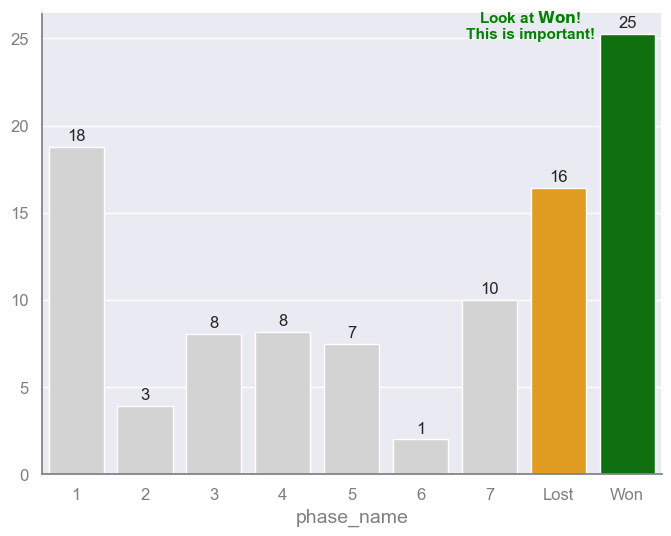

In [136]:
# to color text in Matplotlib annotation

fig, ax = plt.subplots(1,1, figsize=(8, 6))
# Define colors of individual bars
custom_colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'orange', 'green']

sns.barplot(x='phase_name', y='Perc', data=byphase_df, palette = custom_colors)

# ax.bar_label(ax.containers[0], fmt='%.1f%%' )


plt.xticks(size=12)
plt.yticks(size=12)

# Mute colors of labels
ax.set_ylabel('', color = 'grey')
ax.set_xlabel('phase_name', color = 'grey', size=14)


# Mute colors of spines
ax.spines['left'].set_color('grey')   
ax.spines['bottom'].set_color('grey')

# Mute colors of ticks
ax.tick_params(colors = 'grey')

# Remove ticks on x-axis
ax.tick_params(bottom = False)

# xy: the point to annotate — a.k.a. where your arrow will point towards
# xytext: where to place the text (and where the arrow ends)
# arrowprops = {'arrowstyle' : '->'}: what the arrow should look like

ax.annotate('Look at $\\bf{Won}$! \nThis is important!',  # Make only part of text bold
             xy = (6.6, 25), 
              ha = 'center', # ha
              fontsize = 11,
              fontweight='bold', # Make all of the text bold
              color = 'green'
           )
# Annotate bar chart with values
for bar in ax.patches:
    ax.annotate(int(bar.get_height()),
                xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha = 'center', 
                va = 'center',
                xytext = (0, 8),
                textcoords = 'offset points'
                )

plt.show();

### Drawing horizontal and vertical lines on a plot 
it is a common task when analyzing data or highlighting specific values or regions of interest. In this tutorial, we will explore three different methods to achieve this using Matplotlib: the ‘axhline’ and ‘axvline’ functions, the ‘plot’ function, and the ‘hlines’ and ‘vlines’ functions.

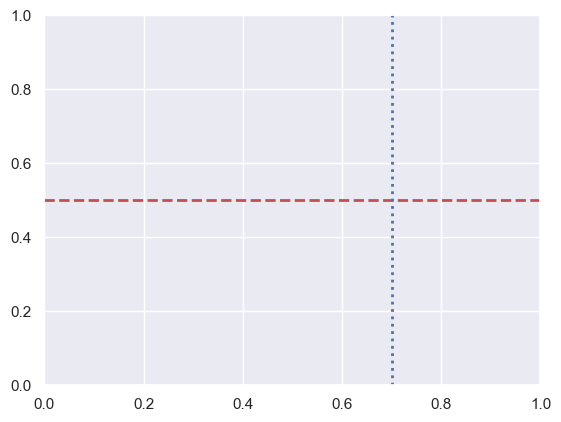

In [3]:
# Method 1. Using the ‘axhline’ and ‘axvline’ Functions
# Create a figure and axis
fig, ax = plt.subplots()

# Plotting horizontal line
ax.axhline(y=0.5, color='r', linestyle='--', linewidth=2)

# Plotting vertical line
ax.axvline(x=0.7, color='b', linestyle=':', linewidth=2)

# Display the plot
plt.show();

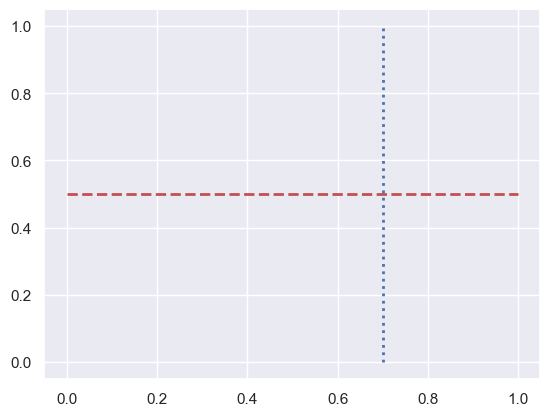

In [4]:
# Method 2: Using the ‘plot’ Function
# Create x-axis values
x = np.linspace(0, 1, 100)

# Create y-axis values for horizontal line
y_hline = np.full_like(x, 0.5)

# Create y-axis values for vertical line
y_vline = np.linspace(0, 1, 100)

# Create a figure and axis
fig, ax = plt.subplots()

# Plotting horizontal line
ax.plot(x, y_hline, color='r', linestyle='--', linewidth=2)

# Plotting vertical line
ax.plot([0.7, 0.7], [0, 1], color='b', linestyle=':', linewidth=2)

# Display the plot
plt.show();

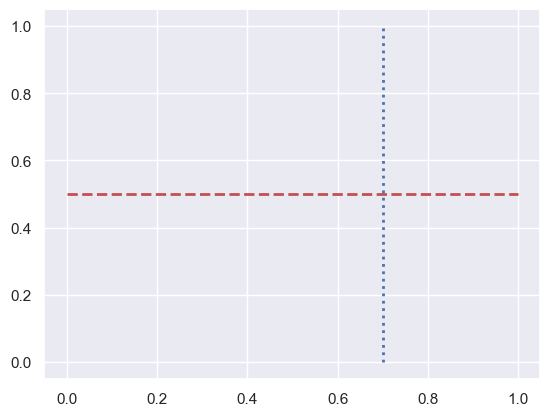

In [5]:
# Method 3: Using the ‘hlines’ and ‘vlines’ Functions

# Create a figure and axis
fig, ax = plt.subplots()

# Plotting horizontal line
ax.hlines(0.5, 0, 1, colors='r', linestyles='--', linewidths=2)

# Plotting vertical line
ax.vlines(0.7, 0, 1, colors='b', linestyles=':', linewidths=2)

# Display the plot
plt.show();

In [43]:
# 'priority'
dfo['priority'].value_counts()

High                               10058
Medium                              5463
Restricted: GPS Sector Priority     1798
Low                                 1326
Restricted: GPS Top Priority         207
Name: priority, dtype: int64

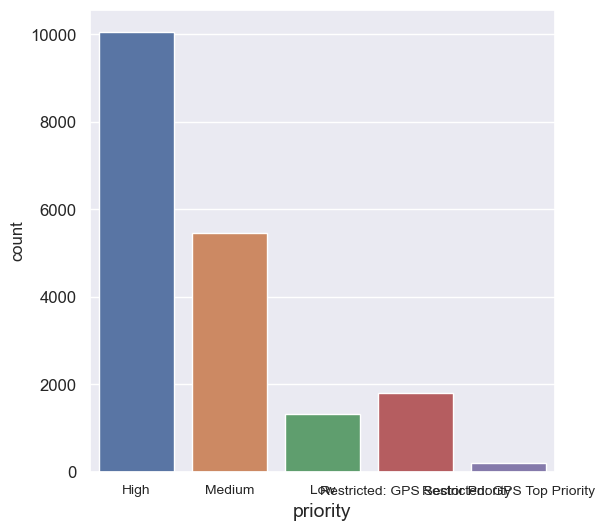

In [44]:
#plot
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x=dfo.priority)
plt.xticks(size=10)
plt.yticks(size=12)
plt.xlabel('priority', size=14)
plt.show()

In [45]:
# fill in 'nan' with 'No' priority
dfo.loc[dfo['priority'].isnull(), 'priority'] = 'Low'
dfo.loc[dfo['priority'].str.contains('GPS'), 'priority'] = 'High'

# no_priority = dfo.groupby('priority').priority.count().nlargest(1).index
# dfo['priority'] = dfo.priority.where(dfo.priority.isin(no_priority), other='Yes')
# keep 2 categories
dfo['priority'].value_counts()

Low       533031
High       12063
Medium      5463
Name: priority, dtype: int64

In [46]:
# group by 'priority'
groups = dfo.groupby('priority')

bypriority_index = [x[0] for x in groups]
print(bypriority_index)

bypriority_num_opportunity = [x[1]['opportunity_id'].nunique() for x in groups]
print(bypriority_num_opportunity)

bypriority_df = pd.DataFrame({
    'priority': bypriority_index,
    'count of opportunies': bypriority_num_opportunity
})

['High', 'Low', 'Medium']
[1425, 103296, 829]


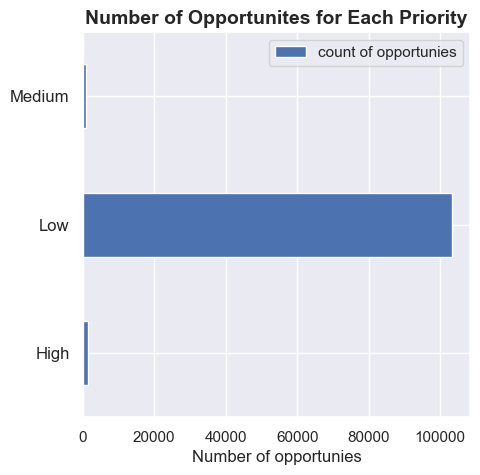

In [47]:
ax = bypriority_df.plot(kind='barh', figsize=(5, 5))
ax.set_title('Number of Opportunites for Each Priority',
             fontsize=14,
             fontweight="bold",
             horizontalalignment="center")
ax.set_xlabel('Number of opportunies', fontsize=12)
ax.set_yticklabels(bypriority_index, fontsize=12)
plt.show()

In [48]:
# product_category2_text
dfo['product_category2_id'].unique()

array(['category68', 'category40', 'category51', 'category56',
       'category6', 'category34', 'category18', 'category42', 'category8',
       'category52', 'category50', 'category20', 'category21',
       'category53', 'category26', 'category65', 'category19',
       'category22', 'category64', 'category35', nan, 'category38',
       'category12', 'category60', 'category1', 'category5', 'category66',
       'category3', 'category7', 'category17', 'category57', 'category23',
       'category58', 'category14', 'category46', 'category55',
       'category4', 'category10', 'category2', 'category37', 'category67',
       'category61', 'category33', 'category62', 'category63',
       'category27', 'category45', 'category15', 'category44',
       'category36', 'category25', 'category59', 'category29',
       'category9', 'category39', 'category49', 'category41',
       'category24', 'category13', 'category43', 'category16',
       'category30', 'category28', 'category31', 'category32'],
  

In [49]:
# ‘product_category2_text’
dfo['product_category2_id'] = dfo.product_category2_id.str[8:]
# ‘product_category3_text’
dfo['product_category3_id'] = dfo.product_category3_id.str[12:]

# fill in NaN with 'unknown'
dfo.fillna({
    'product_category2_id': '0',
    'product_category3_id': '0'
},
           inplace=True)

In [50]:
# Fill in the missing values
dfo.loc[dfo['strategic_opportunity'].isnull(), 'strategic_opportunity'] = 'No'
# list top category
no_opportunity = dfo.groupby(
    'strategic_opportunity').strategic_opportunity.count().nlargest(1).index

# use 'Yes' and 'No' to denote the presense and absence of 'strategic_opportunity'
dfo['strategic_opportunity'] = dfo.strategic_opportunity.where(
    dfo.strategic_opportunity.isin(no_opportunity), other='Yes')
# keep 2 categories
dfo['strategic_opportunity'].value_counts()

No     529737
Yes     20820
Name: strategic_opportunity, dtype: int64

In [51]:
# remove special characters in 'buyer_role_desc' by str.replace() method
spec_chars = ["/", ".", "â", "€", "“", "-"]
for char in spec_chars:
    dfo['buyer_role_desc'] = dfo['buyer_role_desc'].str.replace(char, ' ')

# fill in NaN with 'other'
dfo.loc[dfo['buyer_role_desc'].isnull(), 'buyer_role_desc'] = 'other'

# use str.stripe() and str.contains() to clean 'buyer_role_desc'
dfo['buyer_role_desc'] = dfo['buyer_role_desc'].str.strip()

# rename
dfo.loc[dfo['buyer_role_desc'].str.contains('Other'),
        'buyer_role_desc'] = 'other'
dfo.loc[dfo['buyer_role_desc'].str.contains(
    'Director|Manager|CFO|CIO|CEO|COO|CTO|CAO|Chief|VP|chf|CHRO|CSO'),
        'buyer_role_desc'] = 'management'
dfo.loc[dfo['buyer_role_desc'].str.contains(
    'Academia|Admin|Committee|Controller|General|Staff|Treasurer'),
        'buyer_role_desc'] = 'other'

# review new 'buyer_role_desc'
dfo.buyer_role_desc.value_counts()

other         516630
management     33927
Name: buyer_role_desc, dtype: int64

In [52]:
# 'opportunity_id'
dfo['opportunity_id'] = dfo['opportunity_id'].str[3:]

In [53]:
# checking if any missing
dfo.isna().sum()

opportunity_open_closed_indicator         0
phase_name                                0
priority                                  0
customer                                  0
product_category4_id                      0
product_category2_id                      0
product_category3_id                      0
pursuit_leader                            0
buyer_role_desc                           0
strategic_opportunity                     0
opportunity_id                            0
Year-month                                0
pursuit_start_date                        0
project_start_date                   237259
project_end_date                     248814
snapshot_fiscal_year_period               0
probability_prc                           0
total_sales                               0
Year                                      0
weighted_sales                         7445
project_days                         248814
opportunity_indicator                     0
dtype: int64

###  Numerical Variables 

In [54]:
dfn = dfo.copy()

In [55]:
dfn.describe()

probability_prc   total_sales           Year  weighted_sales  \
count    550557.000000  5.505570e+05  550557.000000    5.431120e+05   
mean         33.807698  1.245307e+06    2019.541550    3.547102e+05   
std          37.314846  8.833798e+06       0.498271    2.371739e+06   
min           0.000000 -1.000000e+07    2019.000000   -1.782000e+04   
25%           0.000000  5.000000e+04    2019.000000    0.000000e+00   
50%          25.000000  1.946650e+05    2020.000000    1.000000e+04   
75%          75.000000  6.674200e+05    2020.000000    1.053657e+05   
max         100.000000  3.000000e+09    2020.000000    3.100000e+08   

        project_days  opportunity_indicator  
count  301743.000000          550557.000000  
mean      613.829636               0.864933  
std       689.281612               0.341795  
min      -239.000000               0.000000  
25%       183.000000               1.000000  
50%       375.000000               1.000000  
75%       767.000000               1.000000  
max     33247.000000               1.000000

### Remove outliers 

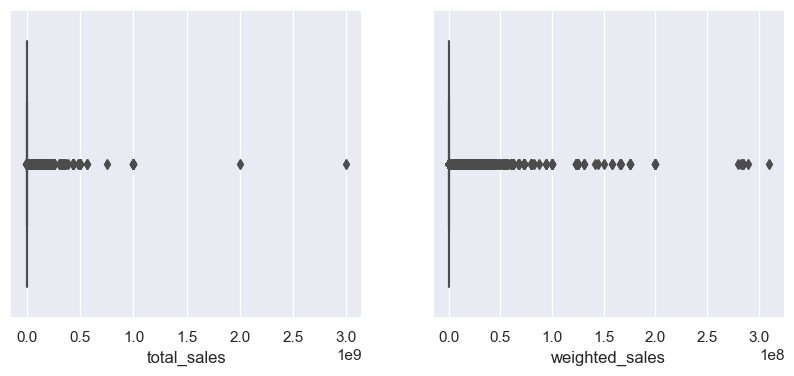

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=dfn['total_sales'])

plt.subplot(1, 2, 2)
sns.boxplot(x=dfn['weighted_sales'])

plt.ylabel("")
plt.show()

In [57]:
# correct negative values and assume all sales records have to be greater than 0
dfn.loc[(dfn['weighted_sales'] < 0), 'weighted_sales'] = abs(dfn['weighted_sales'])

In [58]:
# remove outliers
q1 = dfn['total_sales'].quantile(0.25)
q3 = dfn['total_sales'].quantile(0.75)
IQR = q3 - q1

filter = (dfn['total_sales'] >= q1 - 1.5 * IQR) & (dfn['total_sales'] <= q3 + 1.5 * IQR)
dfn_cut = dfn.loc[filter]
dfn_cut.shape

(476558, 22)

In [59]:
# remove outliers
q1 = dfn['weighted_sales'].quantile(0.25)
q3 = dfn['weighted_sales'].quantile(0.75)
IQR = q3 - q1

filter = (dfn_cut['weighted_sales'] >=
          q1 - 1.5 * IQR) & (dfn_cut['weighted_sales'] <= q3 + 1.5 * IQR)
dfn_cut2 = dfn_cut.loc[filter]
dfn_cut2.shape

(429248, 22)

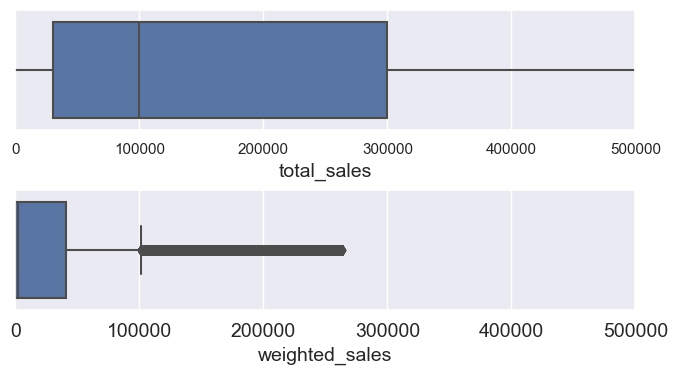

In [60]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
# plt.subplot(1,2,1)
sns.boxplot(x=dfn_cut2['total_sales'], ax=ax[0])
ax[0].set_xlabel('total_sales', size=14)
ax[0].set_ylabel('')
ax[0].set(xlim=(0, 500_000))

#Give the subplots a little "breathing room" with a hspace of 0.5
plt.subplots_adjust(bottom=0.5, top=1, wspace=0.2, hspace=0.5)

# plt.subplot(1,2,2)
sns.boxplot(x=dfn_cut2['weighted_sales'], ax=ax[1])
ax[1].set_xlabel('weighted_sales', size=14)
ax[1].set_ylabel('')
ax[1].set(xlim=(0, 500_000))

plt.xticks(size=14)
plt.yticks(size=14)

plt.ylabel("")
plt.show()

In [61]:
# fill in missing 'weighted_sales'
dfn_cut2['weighted_sales'].fillna(value=dfn_cut2.probability_prc *
                                  dfn_cut2.total_sales,
                                  inplace=True)

dfn_cut2['probability_prc'] = dfn_cut2['probability_prc'].astype('int8')
dfn_cut2['total_sales'] = dfn_cut2['total_sales'].astype('int32')
dfn_cut2['weighted_sales'] = dfn_cut2['weighted_sales'].astype('int32')

In [62]:
# get summary statistics
dfn_cut2.describe().T

count           mean            std       min  \
probability_prc        429248.0      29.416836      35.940867       0.0   
total_sales            429248.0  227912.214121  297743.105195 -195000.0   
Year                   429248.0    2019.538950       0.498481    2019.0   
weighted_sales         429248.0   32700.103302   56911.177355       0.0   
project_days           204033.0     471.045713     607.748631    -239.0   
opportunity_indicator  429248.0       0.857376       0.349689       0.0   

                           25%       50%       75%        max  
probability_prc            0.0      10.0      50.0      100.0  
total_sales            30000.0  100000.0  300000.0  1593310.0  
Year                    2019.0    2020.0    2020.0     2020.0  
weighted_sales             0.0    2000.0   40500.0   263403.0  
project_days             151.0     303.0     520.0    33247.0  
opportunity_indicator      1.0       1.0       1.0        1.0

In [63]:
dfn_cut2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429248 entries, 0 to 550856
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   opportunity_open_closed_indicator  429248 non-null  object        
 1   phase_name                         429248 non-null  object        
 2   priority                           429248 non-null  object        
 3   customer                           429248 non-null  object        
 4   product_category4_id               429248 non-null  object        
 5   product_category2_id               429248 non-null  object        
 6   product_category3_id               429248 non-null  object        
 7   pursuit_leader                     429248 non-null  object        
 8   buyer_role_desc                    429248 non-null  object        
 9   strategic_opportunity              429248 non-null  object        
 10  opportunity_id      

### Product Map Data

In [64]:
# load the data and view the dataset
product_map = pd.read_csv('ProductMapping.csv')
product_map.head()

Product_Category4_id  Category1  CATEGORY1  Category2  CategorY3  \
0                   126        NaN        NaN        NaN        NaN   
1                   129        NaN        NaN        NaN        NaN   
2                   132        NaN        NaN        NaN        NaN   
3                   135        NaN        NaN        NaN        NaN   
4                   138        NaN        NaN        NaN        NaN   

   Category4  CAtegory3  Category3  CaTegory1  CategOry2  CATEgory3  category3  
0        NaN        NaN        1.0        NaN        NaN        NaN        NaN  
1        NaN        NaN        1.0        NaN        NaN        NaN        NaN  
2        NaN        NaN        1.0        NaN        NaN        NaN        NaN  
3        NaN        NaN        1.0        NaN        NaN        NaN        NaN  
4        NaN        NaN        1.0        NaN        NaN        NaN        NaN

In [65]:
# change column names for consistency
product_map.columns = product_map.columns.str.lower()
# Get a summary of the dataset and check data types
product_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_category4_id  639 non-null    int64  
 1   category1             26 non-null     float64
 2   category1             171 non-null    float64
 3   category2             109 non-null    float64
 4   category3             30 non-null     float64
 5   category4             2 non-null      float64
 6   category3             3 non-null      float64
 7   category3             258 non-null    float64
 8   category1             21 non-null     float64
 9   category2             3 non-null      float64
 10  category3             6 non-null      float64
 11  category3             10 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 60.0 KB


In [66]:
product_map['product_category4_id'] = product_map[
    'product_category4_id'].astype(str)

In [67]:
# stack() creates a series with a MultiIndex and takes care of the null values;
# It aligns the second level on the column names and because the column names are the same there is only one - unstacking just produces a single column.
s = product_map.stack()
product_cleaned = s.unstack()
product_cleaned.head()

category1 category2 category3 category4 product_category4_id
0       NaN       NaN       1.0       NaN                  126
1       NaN       NaN       1.0       NaN                  129
2       NaN       NaN       1.0       NaN                  132
3       NaN       NaN       1.0       NaN                  135
4       NaN       NaN       1.0       NaN                  138

In [68]:
# add a new column 'product_category4_text'
product_cleaned['product_category4_map'] = pd.Series(
    product_cleaned.columns.get_indexer(product_cleaned.notna().idxmax(axis=1)) + 1).astype('str')
product_cleaned.head()

category1 category2 category3 category4 product_category4_id  \
0       NaN       NaN       1.0       NaN                  126   
1       NaN       NaN       1.0       NaN                  129   
2       NaN       NaN       1.0       NaN                  132   
3       NaN       NaN       1.0       NaN                  135   
4       NaN       NaN       1.0       NaN                  138   

  product_category4_map  
0                     3  
1                     3  
2                     3  
3                     3  
4                     3

In [69]:
#save `product_category4_id` and `product_category4_text` columns into a new dataframe
product_map_new = product_cleaned[['product_category4_id', 'product_category4_map']]
product_map_new.head()

product_category4_id product_category4_map
0                  126                     3
1                  129                     3
2                  132                     3
3                  135                     3
4                  138                     3

In [70]:
product_map_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 638
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_category4_id   639 non-null    object
 1   product_category4_map  639 non-null    object
dtypes: object(2)
memory usage: 15.0+ KB


### Merge two dataframes

In [71]:
# merge two dataframes
df2 = dfn_cut2.merge(product_map_new, on='product_category4_id', how='left')

In [72]:
df2.fillna({'product_category4_map': '0'}, inplace=True)

In [73]:
df2.head()

opportunity_open_closed_indicator phase_name priority  customer  \
0                            CLOSED       Lost      Low  24031560   
1                              OPEN          5      Low  24031560   
2                              OPEN          5      Low  24031560   
3                              OPEN          5      Low  24031560   
4                              OPEN          5      Low  24031560   

  product_category4_id product_category2_id product_category3_id  \
0                 1878                   68                   91   
1                 1878                   68                   91   
2                 1878                   68                   91   
3                 1878                   68                   91   
4                 1878                   68                   91   

  pursuit_leader buyer_role_desc strategic_opportunity opportunity_id  \
0          22241           other                    No          28949   
1          22241           other                    No          28949   
2          22241           other                    No          28949   
3          22241           other                    No          28949   
4          22241           other                    No          28949   

  Year-month pursuit_start_date project_start_date project_end_date  \
0    2020-04         2018-03-13         2019-10-01       2020-04-02   
1    2019-11         2018-03-13         2019-06-03       2019-12-02   
2    2020-03         2018-03-13         2019-10-01       2020-04-02   
3    2019-12         2018-03-13         2019-06-03       2019-12-02   
4    2019-09         2018-03-13         2019-03-04       2019-10-01   

  snapshot_fiscal_year_period  probability_prc  total_sales  Year  \
0                  2020-04-01                0       550000  2020   
1                  2019-11-01               25       550000  2019   
2                  2020-03-01               25       550000  2020   
3                  2019-12-01               25       550000  2019   
4                  2019-09-01               25       550000  2019   

   weighted_sales  project_days  opportunity_indicator product_category4_map  
0               0         751.0                      0                     1  
1          137500         629.0                      1                     1  
2          137500         751.0                      1                     1  
3          137500         629.0                      1                     1  
4          137500         567.0                      1                     1

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445911 entries, 0 to 445910
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   opportunity_open_closed_indicator  445911 non-null  object        
 1   phase_name                         445911 non-null  object        
 2   priority                           445911 non-null  object        
 3   customer                           445911 non-null  object        
 4   product_category4_id               445911 non-null  object        
 5   product_category2_id               445911 non-null  object        
 6   product_category3_id               445911 non-null  object        
 7   pursuit_leader                     445911 non-null  object        
 8   buyer_role_desc                    445911 non-null  object        
 9   strategic_opportunity              445911 non-null  object        
 10  opportunity_id      

### Base Customers Data

In [75]:
# load the data and view the base customer dataset
base_customer = pd.read_csv('BaseCustomer.csv')
base_customer.head()

SNAPSHOT_FISCAL_YEAR  SNAPSHOT_FISCAL_YEAR_PERIOD    customer  \
0                  2019                      2019013  24065391.0   
1                  2019                      2019009  24057411.0   
2                  2020                      2020004  24069264.0   
3                  2020                      2020006  24476988.0   
4                  2020                      2020006  24032544.0   

  customer_PROGRAM_DESC customer_TEXT New_Client_Flag customer_INDUSTRY_DESC  \
0                   NaN   customer563             NaN              Industry1   
1                   NaN  customer2118             NaN              INDUSTRY7   
2                   NaN  customer9021             NaN              Industry1   
3                   NaN  customer6698             NaN              INDUSTRY7   
4                   NaN  customer1587             NaN              INDUSTRY3   

  customer_salelead customer_OFFICE_DESC  customer_REGION_DESC  \
0               NaN               NON-US  US - National Office   
1               NaN              PHOENIX             US - West   
2               NaN               BOSTON             US - East   
3               NaN               NON-US  US - National Office   
4               NaN               BOSTON             US - East   

  customer_SECTOR_DESC customer_SIC_TEXT customer_SUB_SECTOR_DESC  
0             Sector22             SIC62             Sub Sector53  
1             Sector21            SIC983             Sub Sector57  
2              Sector4            SIC618             Sub Sector44  
3             Sector20            SIC808             Sub Sector54  
4              Sector2            SIC905              Sub Sector7

In [76]:
base_customer.shape

(96521, 13)

In [77]:
base_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96521 entries, 0 to 96520
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SNAPSHOT_FISCAL_YEAR         96521 non-null  int64  
 1   SNAPSHOT_FISCAL_YEAR_PERIOD  96521 non-null  int64  
 2   customer                     96507 non-null  float64
 3   customer_PROGRAM_DESC        12863 non-null  object 
 4   customer_TEXT                96507 non-null  object 
 5   New_Client_Flag              4012 non-null   object 
 6   customer_INDUSTRY_DESC       96507 non-null  object 
 7   customer_salelead            20153 non-null  object 
 8   customer_OFFICE_DESC         96500 non-null  object 
 9   customer_REGION_DESC         96500 non-null  object 
 10  customer_SECTOR_DESC         96507 non-null  object 
 11  customer_SIC_TEXT            96507 non-null  object 
 12  customer_SUB_SECTOR_DESC     96507 non-null  object 
dtypes: float64(1), i

In [78]:
# lowercase colunm names
base_customer.columns = base_customer.columns.str.lower()

base_customer.rename(columns={'customer_program_desc':'customer_program', 'customer_industry_desc':'customer_industry', \
                              'customer_office_desc':'customer_office', 'customer_region_desc':'customer_region', \
                              'customer_sector_desc':'customer_sector', 'customer_sic_text':'customer_sic', \
                              'customer_sub_sector_desc':'customer_sub_sector'}, inplace=True)

In [79]:
# drop the less useful column 'snapshot_fiscal_year' as it only contains 2 values
base_customer.drop(['snapshot_fiscal_year'], axis=1, inplace=True)

# convert `snapshot_fiscal_year_period` to datetime data type and fix the invalid value '201913' with '202001'
base_customer['snapshot_fiscal_year_period'] = pd.to_datetime((
    base_customer['snapshot_fiscal_year_period'].astype(str).str[:4] +
    base_customer['snapshot_fiscal_year_period'].astype(str).str[-2:]).replace(
        {'201913': '201912'}),
                                                              format="%Y%m")

In [80]:
# turn customer id data type from 'int' to 'string'
base_customer['customer'] = base_customer['customer'].astype('str').str.rstrip(
    '.0')
base_customer['customer'].value_counts()

240003      28
2400693     28
24021057    28
24019452    28
24007521    28
            ..
2446083      1
2449632      1
2447376      1
24460581     1
24015753     1
Name: customer, Length: 11916, dtype: int64

In [81]:
# extract program id from 'customer_program_desc' and fill in missing value
# missing program #7 ?
base_customer['customer_program'] = base_customer['customer_program'].str[-1:]
base_customer.fillna({'customer_program': 'Unknown'}, inplace=True)
base_customer['customer_program'].value_counts()

Unknown    83658
4           2432
3           2030
5           1984
9           1770
2           1594
6           1409
8            837
1            807
Name: customer_program, dtype: int64

In [82]:
# extract customer_text from 'customer_text'
base_customer['customer_text'] = base_customer['customer_text'].str[8:]
base_customer.fillna({'customer_text': 'Unknown'}, inplace=True)
base_customer['customer_text'].value_counts()

7705     87
3030     28
5627     28
11767    28
6031     28
         ..
10767     1
4909      1
3563      1
11705     1
3600      1
Name: customer_text, Length: 12812, dtype: int64

In [83]:
# extract industry_text from 'customer_industry_desc' and fill in hte mising values
base_customer['customer_industry'] = base_customer[
    'customer_industry'].str.lower().str[-1:]
base_customer.fillna({'customer_industry': 'Unknown'}, inplace=True)
base_customer['customer_industry'].value_counts()

1          22927
3          18041
2          15644
7          13180
5          10703
6           9861
4           6151
Unknown       14
Name: customer_industry, dtype: int64

In [84]:
# 'new_client_flag' - fill in NaN with 'N'
base_customer.fillna({'new_client_flag': 'N'}, inplace=True)

# review and check replacing missing values with 'N' worked, with unique()
base_customer['new_client_flag'].value_counts()

N    92509
Y     4012
Name: new_client_flag, dtype: int64

In [85]:
# extract salelead id from 'customer_salelead' and fill in missing values
base_customer['customer_salelead'] = base_customer['customer_salelead'].str[9:]
base_customer.fillna({'customer_salelead': 'Unknown'}, inplace=True)
base_customer['customer_salelead'].value_counts()

Unknown    76368
963           97
806           96
179           91
1194          79
           ...  
276            1
444            1
1089           1
472            1
1116           1
Name: customer_salelead, Length: 1186, dtype: int64

In [86]:
#lowercase the column of customer office
base_customer['customer_office'] = base_customer['customer_office'].str.title()

# remove all instances of where there were parentheses with words in them
base_customer['customer_office'] = base_customer[
    'customer_office'].str.replace(r"\(.*\)", "").str.replace("-", "").str.replace('NAN', 'Unknown')

# fill in nan
base_customer.fillna({'customer_office': 'Unknown'}, inplace=True)
base_customer['customer_office'].value_counts()

New York       8335
NonUs          6573
Chicago        5445
Los Angeles    4892
Boston         4863
               ... 
Arkansas        218
San Juan        175
Camp Hill        92
Fresno           91
Unknown          21
Name: customer_office, Length: 66, dtype: int64

In [87]:
# 'customer_region'
base_customer['customer_region'] = base_customer['customer_region'].str.split(
    '-').str[-1].str.strip()
# fill in nan
base_customer.fillna({'customer_region': 'Unknown'}, inplace=True)
base_customer['customer_region'].value_counts()

East               35994
Central            30866
West               22334
National Office     7306
Unknown               21
Name: customer_region, dtype: int64

In [88]:
# 'customer_sector'
base_customer['customer_sector'] = base_customer['customer_sector'].str[6:]
base_customer.fillna({'customer_sector': 'Unknown'}, inplace=True)
base_customer['customer_sector'].value_counts()

22         9222
23         8591
20         7918
15         7575
18         6561
12         6030
10         5907
13         5594
2          5328
21         5262
7          5109
4          4864
19         4582
17         3742
11         2941
1          2280
16         2162
3           909
8           751
9           518
5           347
6           313
Unknown      14
14            1
Name: customer_sector, dtype: int64

In [89]:
# 'customer_sic_text'
base_customer['customer_sic'] = base_customer['customer_sic'].str[3:]
base_customer.fillna({'customer_sic': 'Unknown'}, inplace=True)
base_customer['customer_sic'].value_counts()

685     8591
808     1883
774     1785
183     1521
394     1438
        ... 
377        1
836        1
970        1
154        1
1075       1
Name: customer_sic, Length: 1056, dtype: int64

In [90]:
# 'customer_sub_sector_desc'
base_customer['customer_sub_sector'] = base_customer[
    'customer_sub_sector'].str[10:]
base_customer.fillna({'customer_sub_sector': 'Unknown'}, inplace=True)

In [91]:
base_customer.isna().sum()

snapshot_fiscal_year_period    0
customer                       0
customer_program               0
customer_text                  0
new_client_flag                0
customer_industry              0
customer_salelead              0
customer_office                0
customer_region                0
customer_sector                0
customer_sic                   0
customer_sub_sector            0
dtype: int64

### Merge all tables together

In [92]:
df_all = df2.merge(base_customer,
                   how='left',
                   on=['customer', 'snapshot_fiscal_year_period'])
df_all.head()

opportunity_open_closed_indicator phase_name priority  customer  \
0                            CLOSED       Lost      Low  24031560   
1                              OPEN          5      Low  24031560   
2                              OPEN          5      Low  24031560   
3                              OPEN          5      Low  24031560   
4                              OPEN          5      Low  24031560   

  product_category4_id product_category2_id product_category3_id  \
0                 1878                   68                   91   
1                 1878                   68                   91   
2                 1878                   68                   91   
3                 1878                   68                   91   
4                 1878                   68                   91   

  pursuit_leader buyer_role_desc strategic_opportunity opportunity_id  \
0          22241           other                    No          28949   
1          22241           other                    No          28949   
2          22241           other                    No          28949   
3          22241           other                    No          28949   
4          22241           other                    No          28949   

  Year-month pursuit_start_date project_start_date project_end_date  ...  \
0    2020-04         2018-03-13         2019-10-01       2020-04-02  ...   
1    2019-11         2018-03-13         2019-06-03       2019-12-02  ...   
2    2020-03         2018-03-13         2019-10-01       2020-04-02  ...   
3    2019-12         2018-03-13         2019-06-03       2019-12-02  ...   
4    2019-09         2018-03-13         2019-03-04       2019-10-01  ...   

   Year  weighted_sales  project_days  opportunity_indicator  \
0  2020               0         751.0                      0   
1  2019          137500         629.0                      1   
2  2020          137500         751.0                      1   
3  2019          137500         629.0                      1   
4  2019          137500         567.0                      1   

   product_category4_map  customer_program  customer_text new_client_flag  \
0                      1               NaN            NaN             NaN   
1                      1               NaN            NaN             NaN   
2                      1               NaN            NaN             NaN   
3                      1               NaN            NaN             NaN   
4                      1               NaN            NaN             NaN   

  customer_industry customer_salelead customer_office customer_region  \
0               NaN               NaN             NaN             NaN   
1               NaN               NaN             NaN             NaN   
2               NaN               NaN             NaN             NaN   
3               NaN               NaN             NaN             NaN   
4               NaN               NaN             NaN             NaN   

  customer_sector customer_sic customer_sub_sector  
0             NaN          NaN                 NaN  
1             NaN          NaN                 NaN  
2             NaN          NaN                 NaN  
3             NaN          NaN                 NaN  
4             NaN          NaN                 NaN  

[5 rows x 33 columns]

In [93]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540242 entries, 0 to 540241
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   opportunity_open_closed_indicator  540242 non-null  object        
 1   phase_name                         540242 non-null  object        
 2   priority                           540242 non-null  object        
 3   customer                           540242 non-null  object        
 4   product_category4_id               540242 non-null  object        
 5   product_category2_id               540242 non-null  object        
 6   product_category3_id               540242 non-null  object        
 7   pursuit_leader                     540242 non-null  object        
 8   buyer_role_desc                    540242 non-null  object        
 9   strategic_opportunity              540242 non-null  object        
 10  opportunity_id      

### Identify 'Won' deals

In [94]:
df_won = df_all[df_all['phase_name'] == 'Won']
df_won.head()

opportunity_open_closed_indicator phase_name priority  customer  \
89                             CLOSED        Won     High  24028941   
90                             CLOSED        Won     High  24028941   
121                            CLOSED        Won      Low  24046725   
371                            CLOSED        Won      Low  24023859   
467                            CLOSED        Won      Low  24053244   

    product_category4_id product_category2_id product_category3_id  \
89                  2001                   51                  152   
90                  2001                   51                  152   
121                 5880                   50                  180   
371                 5898                   50                  180   
467                 5919                   19                  180   

    pursuit_leader buyer_role_desc strategic_opportunity opportunity_id  \
89           14322           other                   Yes        2343587   
90           14322           other                   Yes        2343587   
121           5156           other                    No        2484981   
371           5366           other                    No        2558775   
467          21762           other                    No        2588815   

    Year-month pursuit_start_date project_start_date project_end_date  ...  \
89     2020-05         2017-09-20         2019-10-05       2020-09-11  ...   
90     2020-05         2017-09-20         2019-10-05       2020-09-11  ...   
121    2020-05         2017-02-24         2019-09-30       2019-12-31  ...   
371    2019-09         2018-04-21                NaT              NaT  ...   
467    2019-07         2017-12-14                NaT              NaT  ...   

     Year  weighted_sales  project_days  opportunity_indicator  \
89   2020               0        1087.0                      0   
90   2020               0        1087.0                      0   
121  2020               0        1040.0                      0   
371  2019               0           NaN                      0   
467  2019               0           NaN                      0   

     product_category4_map  customer_program  customer_text new_client_flag  \
89                       1                 1           3608               Y   
90                       1                 1           3608               Y   
121                      2                 6           7052               N   
371                      2                 4            936               N   
467                      2           Unknown          13913               N   

    customer_industry customer_salelead customer_office  customer_region  \
89                  4              1151   Washington Dc             East   
90                  4              1151   Washington Dc             East   
121                 1               918          Boston             East   
371                 2               643      Pittsburgh          Central   
467                 3           Unknown           NonUs  National Office   

    customer_sector customer_sic customer_sub_sector  
89                5          324                  14  
90                5          324                  14  
121               4           77                  17  
371              10           27                   1  
467              12          669                   4  

[5 rows x 33 columns]

In [95]:
df_won.columns

Index(['opportunity_open_closed_indicator', 'phase_name', 'priority',
       'customer', 'product_category4_id', 'product_category2_id',
       'product_category3_id', 'pursuit_leader', 'buyer_role_desc',
       'strategic_opportunity', 'opportunity_id', 'Year-month',
       'pursuit_start_date', 'project_start_date', 'project_end_date',
       'snapshot_fiscal_year_period', 'probability_prc', 'total_sales', 'Year',
       'weighted_sales', 'project_days', 'opportunity_indicator',
       'product_category4_map', 'customer_program', 'customer_text',
       'new_client_flag', 'customer_industry', 'customer_salelead',
       'customer_office', 'customer_region', 'customer_sector', 'customer_sic',
       'customer_sub_sector'],
      dtype='object')

### Pivot a DataFrame using pivot_table

In [96]:
# https://pub.towardsai.net/pandas-cheat-sheet-functions-for-data-analysis-2cf4923266aa
# This code pivots the DataFrame df using the "" column as the index, the "" column as the columns, and the "" column as the values. It calculates the mean age for each combination of  and .
ptable= df_won.pivot_table(index='Year-month', columns='customer_industry', values='total_sales', aggfunc='sum')

In [97]:
ptable.head()

customer_industry          1          2          3          4          5  \
Year-month                                                                 
2019-07            111739235   85335264  128940344  120983244  109205389   
2019-08             82319939   80895029   65090797  146835993   68568073   
2019-09            147572374  120549258  168847297   96101688  117782786   
2019-10            146929482  128126754  169801513  152379157  117612355   
2019-11            172511702  133837662  183362580  190484171  118393714   

customer_industry         6          7  
Year-month                              
2019-07             8983698   80606437  
2019-08             6093227   68567254  
2019-09            12827819  118964062  
2019-10            12847771  135543938  
2019-11            15503014  106139916

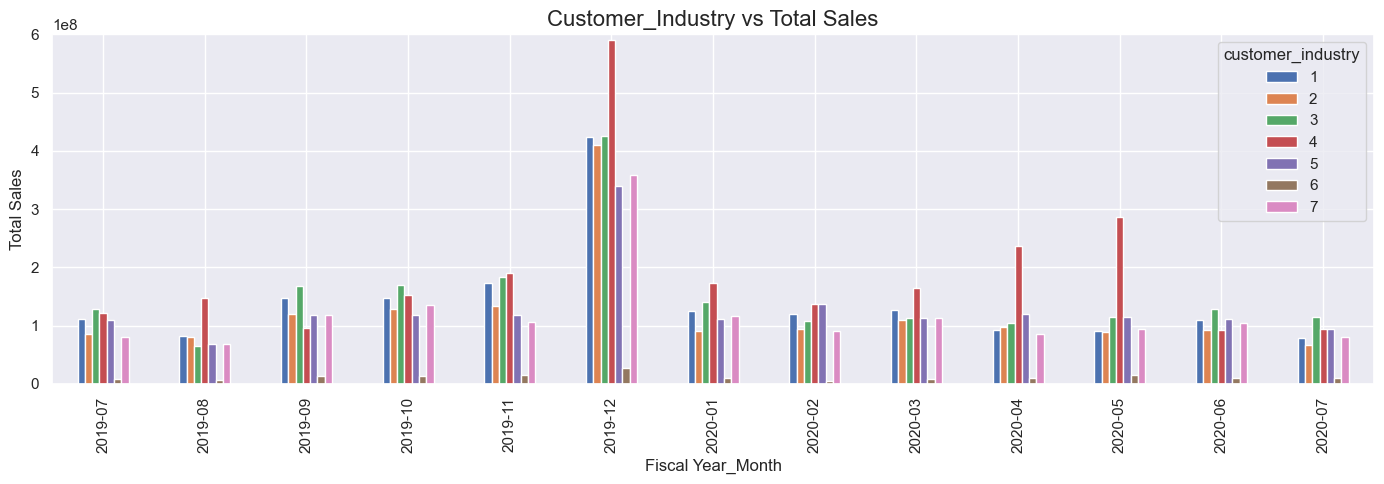

In [98]:

ptable.plot(kind='bar', figsize=(14, 5))
plt.xlabel('Fiscal Year_Month');
plt.title('Customer_Industry vs Total Sales', fontsize=16)
plt.ylabel('Total Sales')
# plt.yscale('log')
plt.ylim([0,600000000])
plt.tight_layout()
plt.show();

### Total Sales

In [99]:
df_won.total_sales.describe()

count    4.965100e+04
mean     2.507972e+05
std      3.139438e+05
min      0.000000e+00
25%      4.342000e+04
50%      1.250000e+05
75%      3.250000e+05
max      1.593310e+06
Name: total_sales, dtype: float64

In [100]:
df_won = df_won[df_won.total_sales > 1000]

In [101]:
df_won[df_won.total_sales == 1.593310e+06]

opportunity_open_closed_indicator phase_name priority  customer  \
462281                            CLOSED        Won      Low  24041496   
462282                            CLOSED        Won      Low  24041496   

       product_category4_id product_category2_id product_category3_id  \
462281                 1998                   51                  152   
462282                 1998                   51                  152   

       pursuit_leader buyer_role_desc strategic_opportunity opportunity_id  \
462281          12140           other                    No        2843187   
462282          12140           other                    No        2843187   

       Year-month pursuit_start_date project_start_date project_end_date  ...  \
462281    2019-12         2019-04-08         2019-05-15       2019-07-31  ...   
462282    2019-12         2019-04-08         2019-05-15       2019-07-31  ...   

        Year  weighted_sales  project_days  opportunity_indicator  \
462281  2019               0         114.0                      0   
462282  2019               0         114.0                      0   

        product_category4_map  customer_program  customer_text  \
462281                      1           Unknown           7877   
462282                      1           Unknown           7877   

       new_client_flag customer_industry customer_salelead customer_office  \
462281               N                 1           Unknown           Tampa   
462282               N                 1           Unknown           Tampa   

       customer_region customer_sector customer_sic customer_sub_sector  
462281            East              22          451                  28  
462282            East              22          451                  28  

[2 rows x 33 columns]

In [102]:
df_won['log_sales'] = np.log(df_won.total_sales)

In [103]:
df_won['log_sales'].describe()

count    48597.000000
mean        11.672978
std          1.399494
min          6.909753
25%         10.778956
50%         11.775290
75%         12.721886
max         14.281324
Name: log_sales, dtype: float64

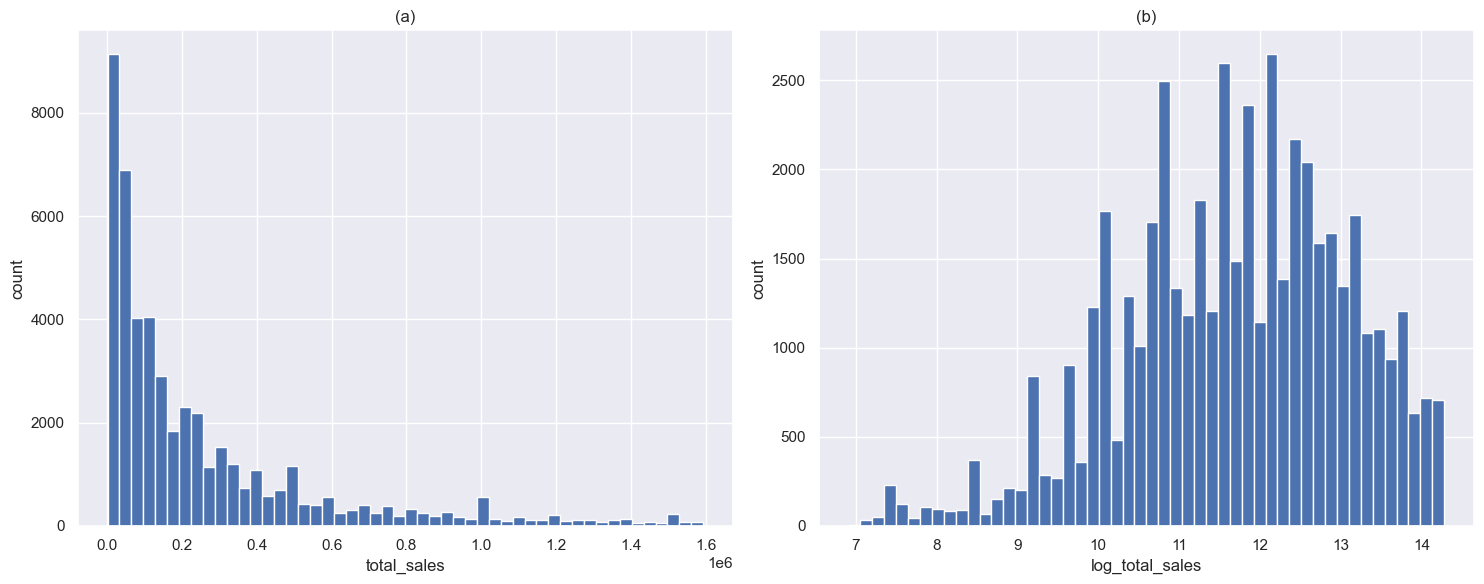

In [104]:
import statsmodels.api as sm

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
df_won.total_sales.hist(bins=50)
plt.xlabel('total_sales')
plt.ylabel('count')
plt.title('(a)');
plt.tight_layout()

plt.subplot(1,2,2)
df_won.log_sales.hist(bins=50)
plt.xlabel('log_total_sales')
plt.ylabel('count')
plt.title('(b)');
plt.tight_layout()

plt.show();
# plt.savefig(out_folder + "price_hist.png")

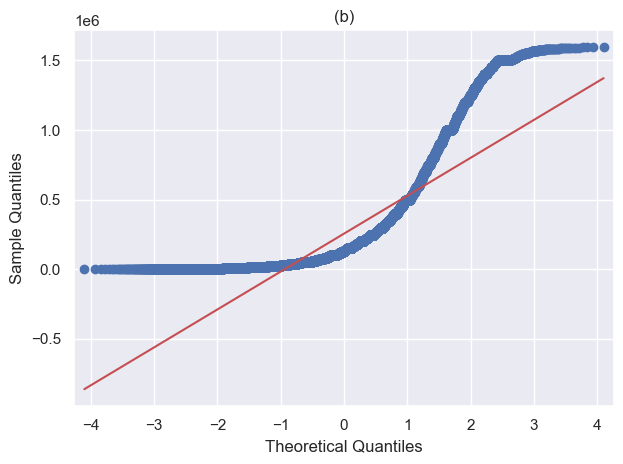

In [105]:
# a
sm.qqplot(df_won.total_sales, line='r')
plt.title('(b)');
plt.tight_layout()
plt.show();

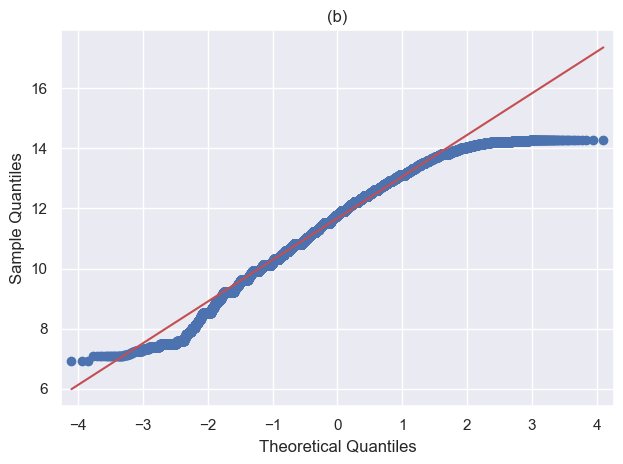

In [106]:
# b
sm.qqplot(df_won.log_sales, line='r')
plt.title('(b)');
plt.tight_layout()
plt.show();

### np.where()

In [107]:
# uses the np.where function to apply this condition element-wise to the column.
df_won['customer_status'] = np.where(df_won['project_days'] <365, 'active', 'inactive')

In [108]:
df_won.customer_status.value_counts()

active      35035
inactive    13562
Name: customer_status, dtype: int64

###  Using crosstab to Reshape a DataFrame

In [109]:
# https://towardsdatascience.com/summarizing-data-with-pandas-crosstab-efc8b9abecf
df_data = pd.crosstab(df_won['customer_industry'], df_won['product_category4_map'], margins = True, normalize = True).style.format('{:.2%}')

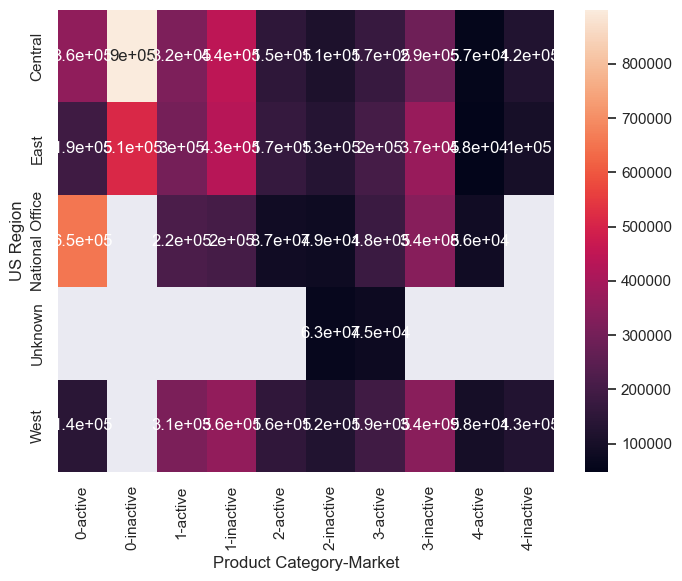

In [110]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.crosstab( df_won['customer_region'] , [df_won['product_category4_map'], df_won['customer_status']],
        rownames=['US Region'], 
        colnames=['Product Category', 'Market'],
        values = df_won['total_sales'],
        aggfunc = 'mean'
    ), 
    annot = True
)
plt.show()

In [111]:
from math import ceil


def countplots(df, max_columns, val, figsize, title_size=60, title=""):
    leh = len(df.columns)
    rows = ceil(leh / max_columns)
    fig = plt.figure(1, figsize=figsize)
    i = 1

    for col in df.columns:
        if len(pd.unique(df[col])) < val:
            plt.subplot(rows, max_columns, i)
            plt.title(col, fontsize=title_size)
            i = i + 1
            p = sns.countplot(data=df, x=col, linewidth=5)
            #to increase y ticks size
            plt.yticks(size=60)
            #to increase x ticks
            plt.xticks(size=60)

    plt.show()


# cols = ['priority']
countplots(df_won, 3, 25, (100, 200), 80)
plt.savefig('images\won.png')
plt.show();

<Figure size 640x480 with 0 Axes>

###  Sales by Industry

In [112]:
total_sales = {}
for y in df_won.groupby('customer_industry'):
    industry = y[0]
    total = sum(y[1].total_sales)
    total_sales[industry] = total

df_total_sales = pd.DataFrame.from_dict(total_sales,
                                        orient='index',
                                        columns=['total_sales'])

df_total_sales = df_total_sales.sort_values(by='total_sales', ascending=False)
df_total_sales.columns = ['total_sales']
df_total_sales[:10]

# df_won.groupby('customer_industry')['total_sales'].sum().sort_values(ascending=False).reset_index()
# df_won.groupby('customer_industry').size().to_frame().reset_index()

total_sales
4   2480998727
3   1963601160
1   1828863190
5   1670656717
2   1598038377
7   1553185323
6    149912276

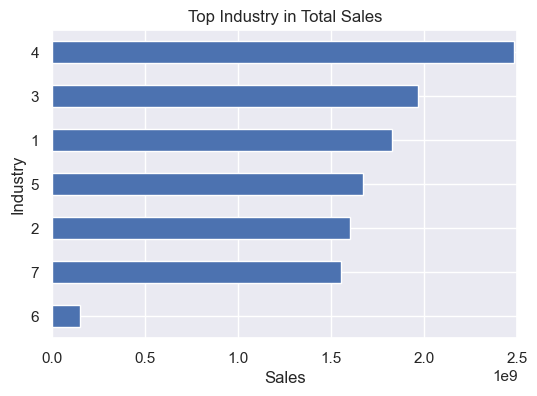

In [113]:
# top industry in sales

# df.plot.barh(x='', y='')
ax = df_total_sales.sort_values(by='total_sales',
                                ascending=True).plot(kind='barh',
                                                     figsize=(6, 4))

ax.set(xlim=(0, 2_500_000_000))
plt.title('Top Industry in Total Sales')
plt.ylabel('Industry')
plt.xlabel('Sales')

plt.legend().remove()
plt.show()

In [115]:

industry_order = ['1', '2', '3', '4', '5', '6', '7']
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=df3_open, x='customer_industry',hue='customer_region', order=industry_order)
plt.xlabel('Customer_Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df_won,y='total_sales',x='customer_industry')
plt.xlabel('industry')
plt.ylabel('')
plt.yscale('log')
plt.ylim([0,10000000])
plt.tight_layout()
plt.show();

NameError: name 'df3_open' is not defined

In [116]:

hue_order = ['N', 'Y']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df3_cut, x='customer_industry', hue='new_client_flag', order=industry_order, hue_order=hue_order)
plt.xlabel('Customer_Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.ylim([0,25000])
plt.tight_layout()
plt.show();

NameError: name 'df3_cut' is not defined

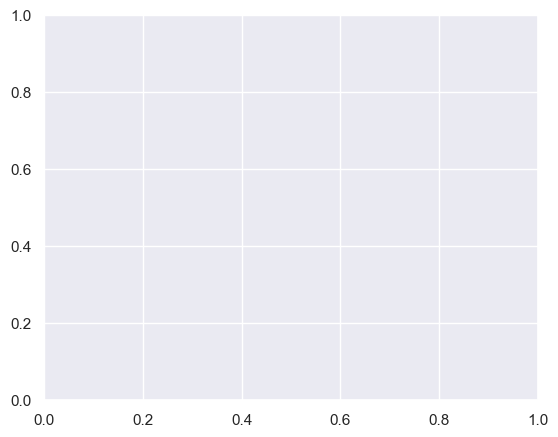

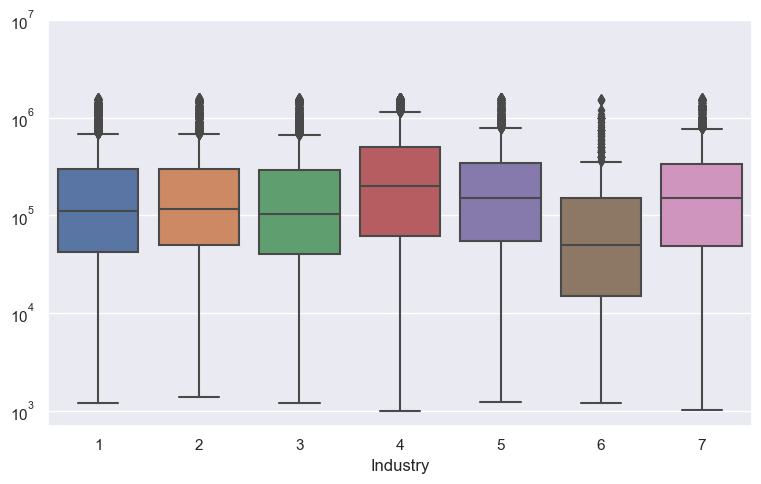

In [117]:
industry_order = ['1', '2', '3', '4', '5', '6', '7']
sns.boxplot(data=df_won,y='total_sales',x='customer_industry', order= industry_order)
plt.xlabel('Industry')
plt.ylabel('')
plt.yscale('log')
plt.ylim([0,10000000])
plt.tight_layout()
plt.show();

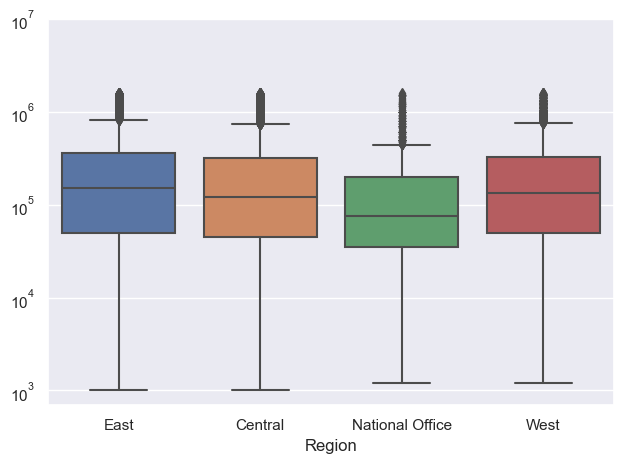

In [118]:
df_won = df_won[df_won['customer_region'] != 'Unknown']

sns.boxplot(data=df_won,y='total_sales',x='customer_region')
plt.xlabel('Region')
plt.ylabel('')
plt.yscale('log')
plt.ylim([0,10000000])
plt.tight_layout()
plt.show();

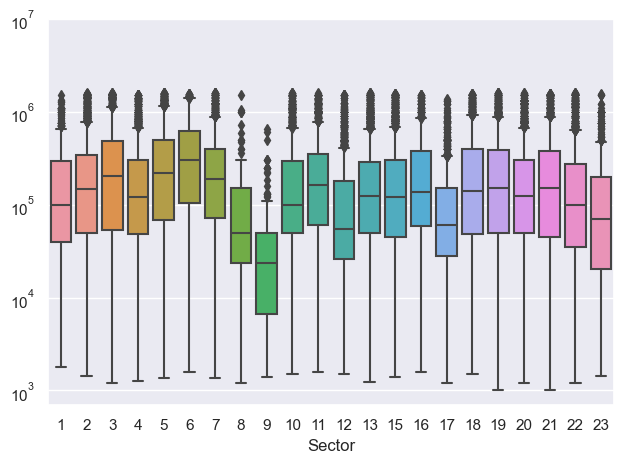

In [119]:
# df_won = df_won[df_won['customer_region'] != 'Unknown']
def keyfunc(s):
    return int(s[:])

sector_order = sorted(list(df_won['customer_sector'].value_counts().index), key=keyfunc)


sns.boxplot(data=df_won,y='total_sales',x='customer_sector', order=sector_order)
plt.xlabel('Sector')
plt.ylabel('')
plt.yscale('log')
plt.ylim([0,10000000])
plt.tight_layout()
plt.show();

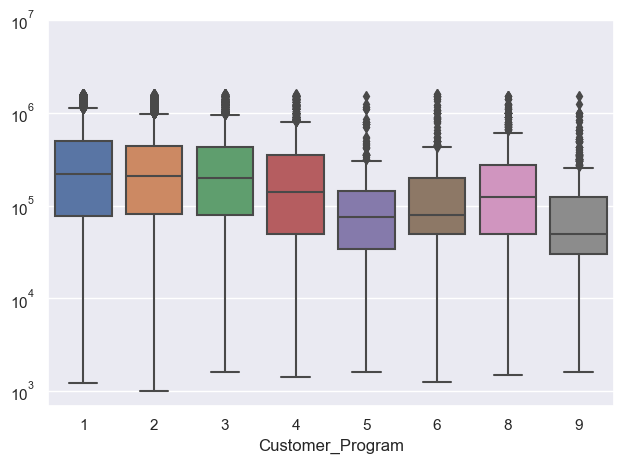

In [120]:
df_won = df_won[df_won['customer_program'] != 'Unknown']

def keyfunc(s):
    return int(s[:])

program_order = sorted(list(df_won['customer_program'].value_counts().index), key=keyfunc)

sns.boxplot(data=df_won,y='total_sales',x='customer_program', order=program_order)
plt.xlabel('Customer_Program')
plt.ylabel('')
plt.yscale('log')
plt.ylim([0,10000000])
plt.tight_layout()
plt.show();

###  Sales by Regions

In [121]:
total_sales = {}

df_won = df_won[df_won['customer_region'] != 'Unknown']
for y in df_won.groupby('customer_region'):
    region = y[0]
    total = sum(y[1].total_sales)
    total_sales[region] = total

df_total_sales = pd.DataFrame.from_dict(total_sales,
                                        orient='index',
                                        columns=['total_sales'])

df_total_sales = df_total_sales.sort_values(by='total_sales', ascending=False)
df_total_sales.columns = ['total_sales']
df_total_sales[:10]

total_sales
East              4330897033
Central           2117215072
West              1283469257
National Office      8537117

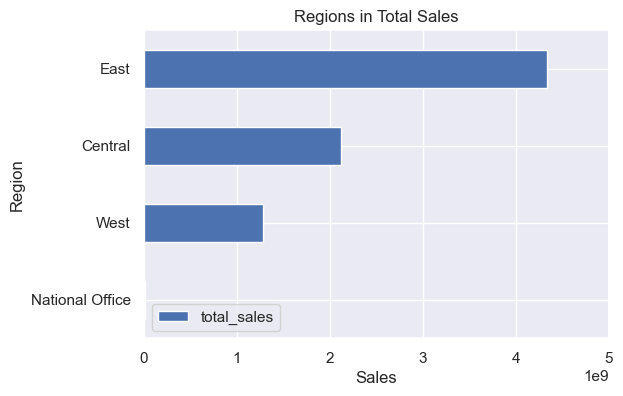

In [122]:
# top performing industry in sales

ax = df_total_sales.sort_values(by='total_sales',
                                ascending=True).plot(kind='barh',
                                                     figsize=(6, 4))

ax.set(xlim=(0, 5_000_000_000))
plt.title('Regions in Total Sales')
plt.ylabel('Region')
plt.xlabel('Sales')
plt.show()

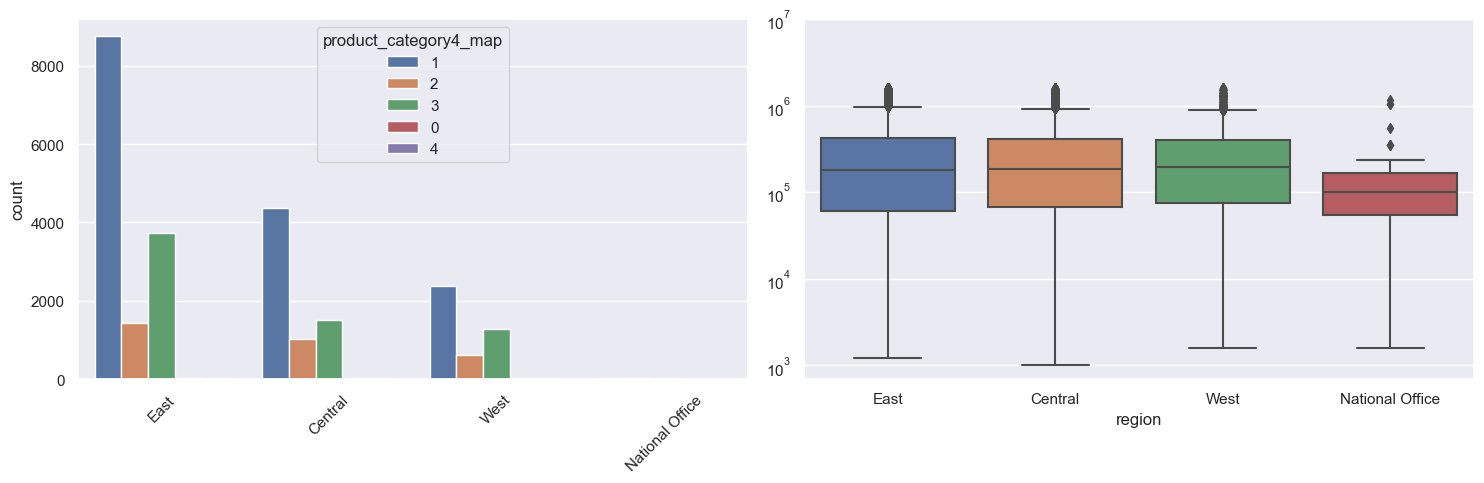

In [123]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df_won, x='customer_region',hue='product_category4_map')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df_won,y='total_sales',x='customer_region')
plt.xlabel('region')
plt.ylabel('')
plt.yscale('log')
plt.ylim([0,10000000])
plt.tight_layout()
plt.show();

### Product categories

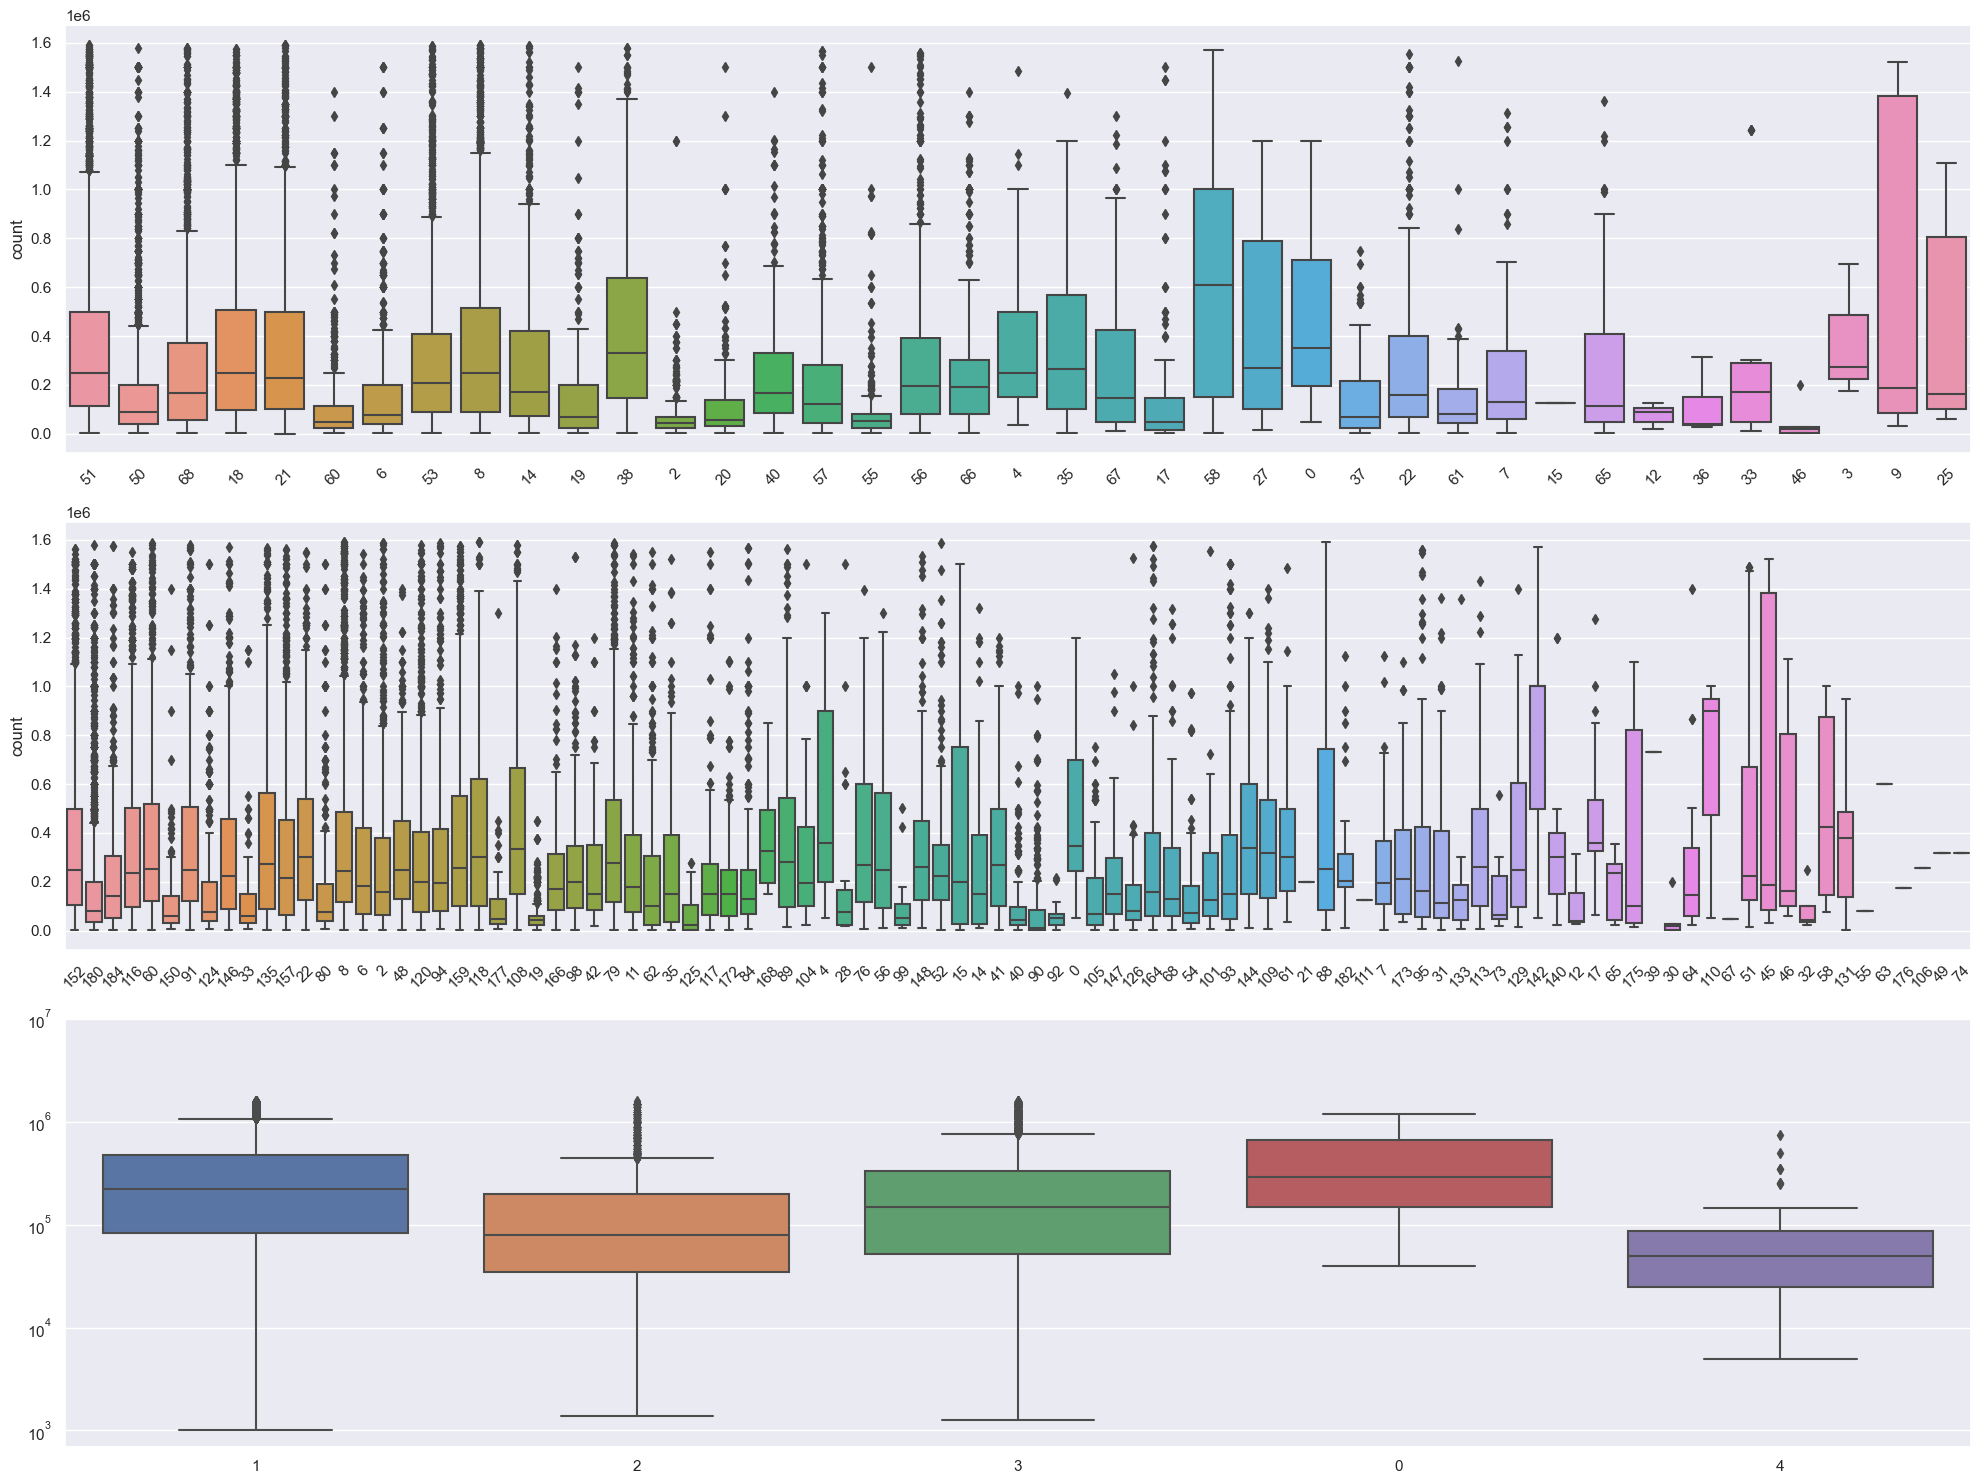

In [124]:
# plot by 'region', 'industry', 'sector' vs 'product_cat4'
order = ['1', '2', '3', '4', '5', '6', '7']
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.boxplot(data=df_won,y='total_sales',x='product_category2_id')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.subplot(3,1,2)
sns.boxplot(data=df_won,y='total_sales',x='product_category3_id')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.subplot(3,1,3)
sns.boxplot(data=df_won,y='total_sales',x='product_category4_map')
plt.xlabel('')
plt.ylabel('')
plt.yscale('log')
plt.ylim([0,10000000])
plt.tight_layout()
plt.show();
# plt.savefig(out_folder + "room_type_bar_box.png")

###  Sales by Sectors

In [126]:
total_sales = {}
for y in df_won.groupby('customer_sector'):
    sector = y[0]
    total = sum(y[1].total_sales)
    total_sales[sector] = total

df_total_sales = pd.DataFrame.from_dict(total_sales,
                                        orient='index',
                                        columns=['total_sales'])

df_total_sales = df_total_sales.sort_values(by='total_sales', ascending=False)
df_total_sales.columns = ['total_sales']
df_total_sales[:10]

total_sales
5     788807508
3     696485880
2     680105366
13    620107565
20    533858872
21    512287470
19    438370865
11    425133269
15    420735160
10    417972892

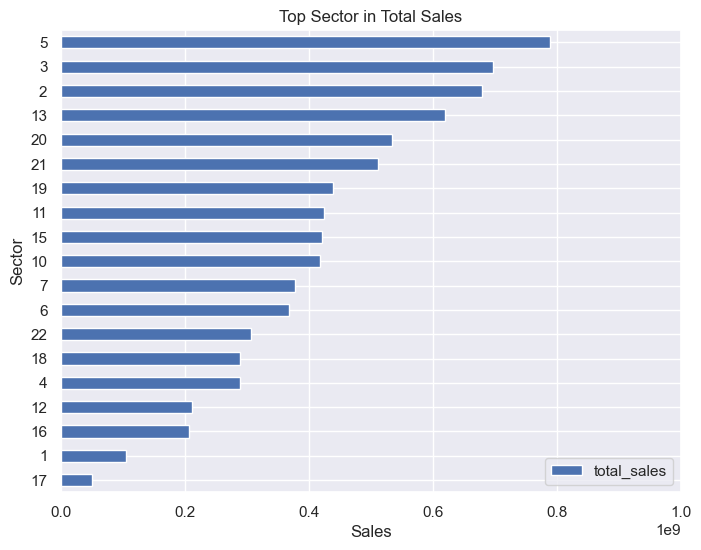

In [130]:
# top sectors in sales
ax = df_total_sales.sort_values(by='total_sales',
                                ascending=True).plot(kind='barh',
                                                     figsize=(8, 6))

ax.set(xlim=(0, 1_000_000_000))
plt.title('Top Sector in Total Sales')
plt.ylabel('Sector')
plt.xlabel('Sales')
plt.show()

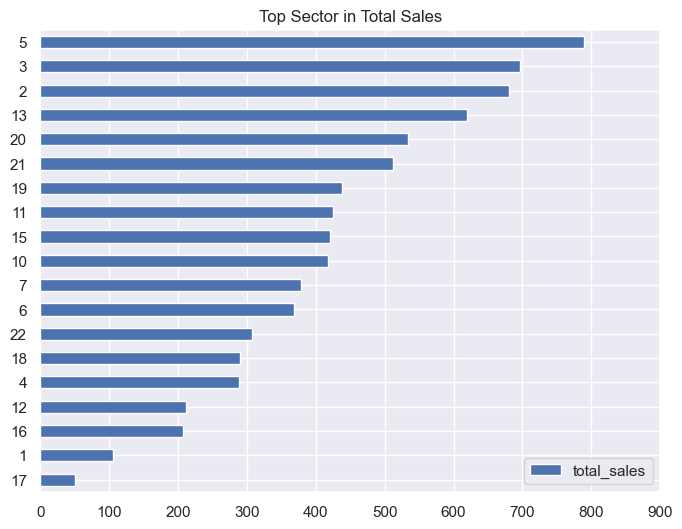

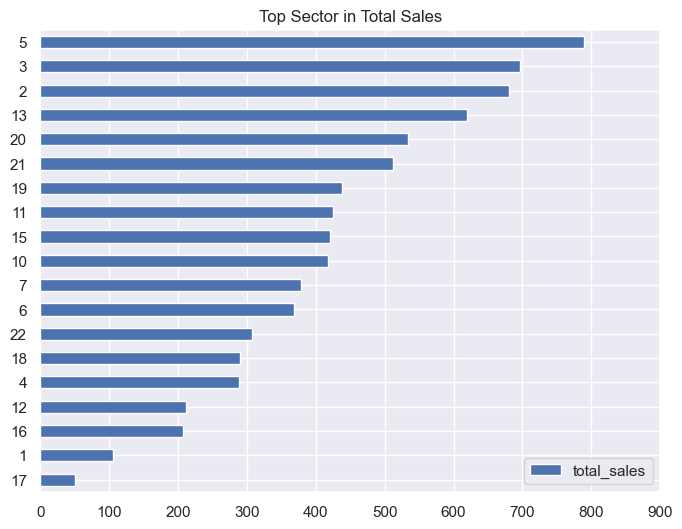

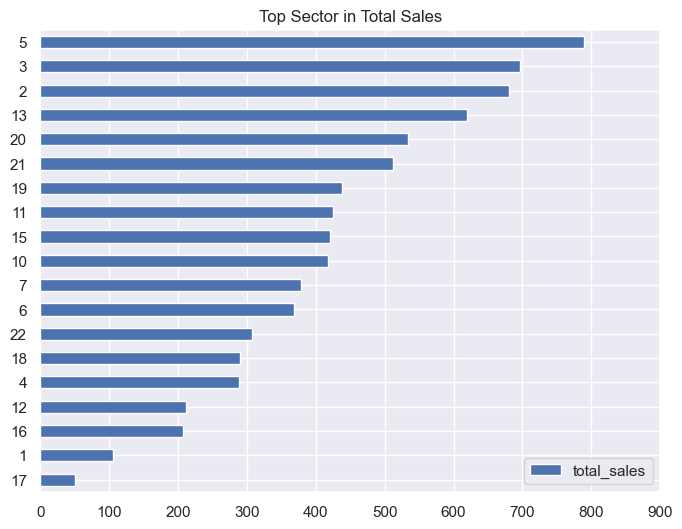

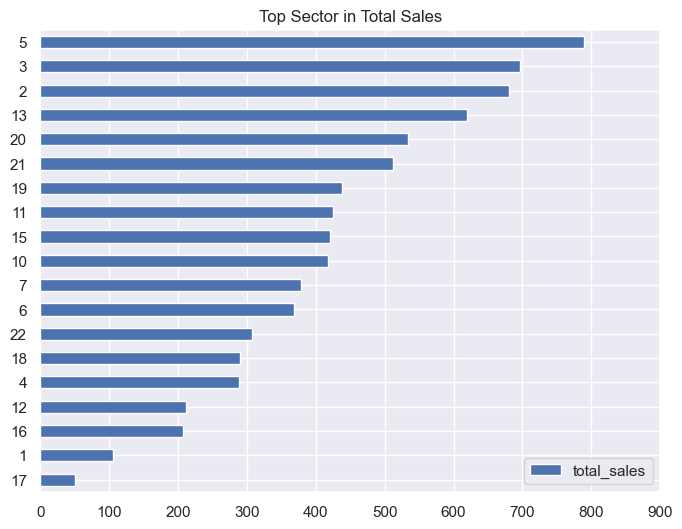

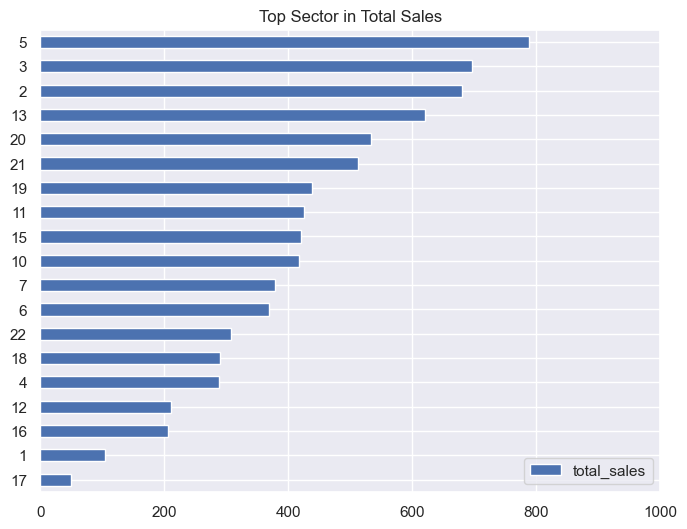

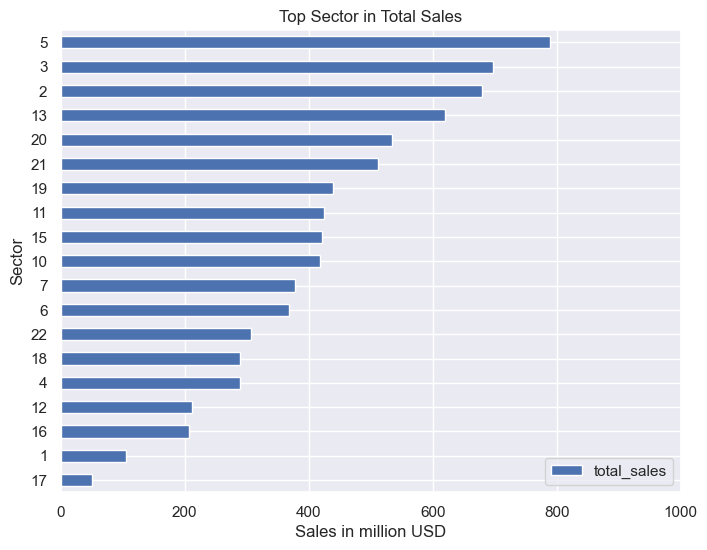

In [140]:
# add ticks

# sectors = [sector for sector, df in df_won.groupby('customer_sector')]

ax = df_total_sales.sort_values(by='total_sales',
                                ascending=True).plot(kind='barh',
                                                     figsize=(8, 6))

ax.set(xlim=(0, 1_000_000_000))

plt.title('Top Sector in Total Sales')

sectors = [sector for sector, df in df_won.groupby('customer_sector')]

labels, location = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))  # scaling in million USD
# plt.yticks(sectors, size=8)

plt.ylabel('Sector')
plt.xlabel('Sales in million USD')  

plt.show();

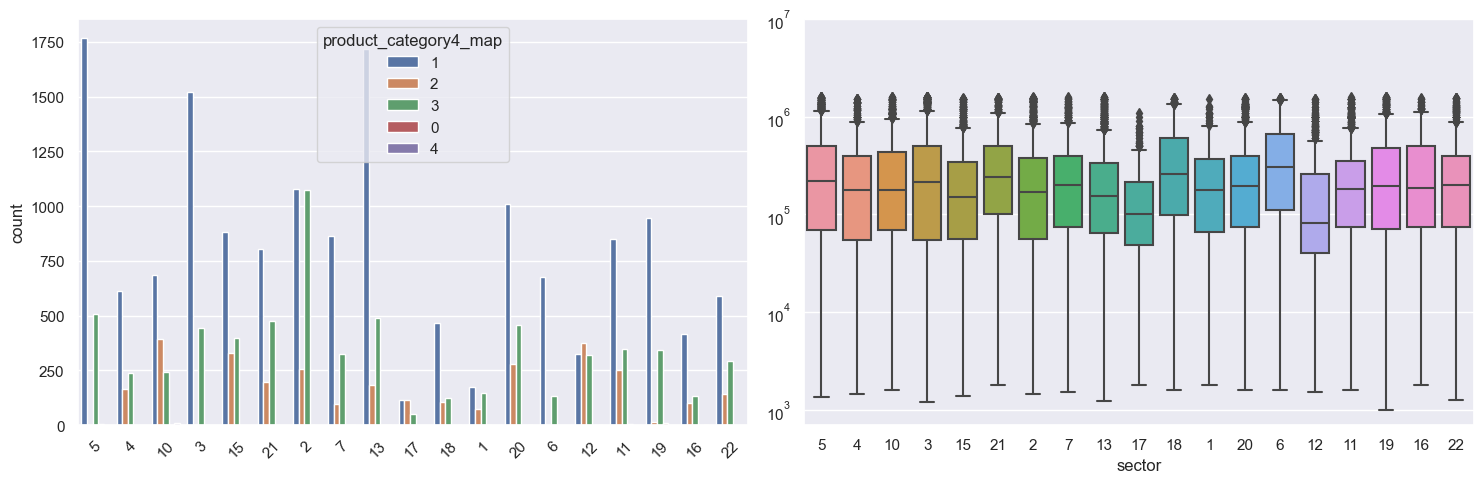

In [129]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df_won, x='customer_sector',hue='product_category4_map')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df_won,y='total_sales',x='customer_sector')
plt.xlabel('sector')
plt.ylabel('')
plt.yscale('log')
plt.ylim([0,10000000])
plt.tight_layout()
plt.show();

### Customer_office

In [ ]:
df_won.customer_office.value_counts(dropna=False)

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)

large_to_small = df_won.groupby('customer_office').size().sort_values().index[::-1]
sns.countplot(data=df_won,x='customer_office',color='royalblue', order=large_to_small)
plt.xlabel("")
plt.xticks(rotation=90)
plt.title('(a)')
plt.subplot(2,1,2)
sns.boxplot(data=df_won.sort_values(by='total_sales'), x='customer_office',y='total_sales', color='royalblue')
plt.yscale('log')
plt.ylim([10,10000000])
plt.xlabel("")
plt.ylabel("USD Dollar Per Sales")
plt.xticks(rotation=90)
# plt.title('(b)')
plt.tight_layout()
plt.show();

###  Top Category 2 Products in total amount of sales

In [ ]:
total_sales = {}
for y in df_won.groupby('product_category2_id'):
    cat2 = y[0]
    total = sum(y[1].total_sales)
    total_sales[cat2] = total

df_total_sales = pd.DataFrame.from_dict(total_sales,
                                        orient='index',
                                        columns=['total_sales'])

df_total_sales = df_total_sales.sort_values(by='total_sales', ascending=False)
df_total_sales.columns = ['total_sales']
df_total_sales[:10]

In [ ]:
ax = df_total_sales[:10].sort_values(by='total_sales',
                                     ascending=True).plot(kind='barh',
                                                          figsize=(8, 6))

ax.set(xlim=(0, 2_500_000_000))
plt.title('Top 10 Category2 Products in Total Sales')
plt.ylabel('Product_Category2')
plt.xlabel('Sales')
plt.show()

###  Top Category 3 Products in total amount of sales

In [ ]:
total_sales = {}
for y in df_won.groupby('product_category3_id'):
    cat3 = y[0]
    total = sum(y[1].total_sales)
    total_sales[cat3] = total

df_total_sales = pd.DataFrame.from_dict(total_sales,
                                        orient='index',
                                        columns=['total_sales'])

df_total_sales = df_total_sales.sort_values(by='total_sales', ascending=False)
df_total_sales.columns = ['total_sales']
df_total_sales[:10]

In [ ]:
ax = df_total_sales[:10].sort_values(by='total_sales',
                                     ascending=True).plot(kind='barh',
                                                          figsize=(8, 6),
                                                          color='teal')

ax.set(xlim=(0, 1_500_000_000))
plt.title('Top 10 Category3 Products in Total Sales')
plt.ylabel('Product_Category3')
plt.xlabel('Sales')
plt.show()

###  Top Category 4 Products in total amount of sales

In [ ]:
total_sales = {}
for y in df_won.groupby('product_category4_id'):
    cat4 = y[0]
    total = sum(y[1].total_sales)
    total_sales[cat4] = total

df_total_sales = pd.DataFrame.from_dict(total_sales,
                                        orient='index',
                                        columns=['total_sales'])

df_total_sales = df_total_sales.sort_values(by='total_sales', ascending=False)
df_total_sales.columns = ['total_sales']
df_total_sales[:10]

In [ ]:
ax = df_total_sales[:10].sort_values(by='total_sales',
                                     ascending=True).plot(kind='barh',
                                                          figsize=(8, 6),
                                                          color='orange')

ax.set(xlim=(0, 1_000_000_000))
plt.title('Top 10 Category4 Products in Total Sales')
plt.ylabel('Product_Category4')
plt.xlabel('Sales')
plt.show()

###  Total sales by Months between July 2019 and July 2020

In [ ]:
df_won['YYYY-mm'] = pd.to_datetime(df_won['snapshot_fiscal_year_period'], format='%Y%b').dt.strftime('%Y-%m')
plot = df_won.groupby(['YYYY-mm'])['total_sales'].sum()
# plot.index
plot = pd.DataFrame(plot).reset_index().sort_values(by='YYYY-mm')

In [ ]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(x='YYYY-mm', y='total_sales', data=plot)
# ax.bar_label(ax.containers[0])
ax.set_ylabel('Total Sales')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Snapshot Fiscal Year-Month', size=14)

plt.savefig('images/sales_months.png')
plt.show();

# df_won.groupby(['plot_date'])['total_sales'].sum().sort_values(ascending=True).plot(kind='bar', color='teal', edgecolor='Black')

## Explore the data

### Identify the latest update Date of each opportunity based on  'snapshot_fiscal_year_period'

In [ ]:
last_update = df_all.groupby('opportunity_id')['snapshot_fiscal_year_period'].max()
last_update

In [ ]:
from functools import reduce

df3 = reduce(
    lambda x, y: pd.merge(x,
                          y,
                          on=['opportunity_id', 'snapshot_fiscal_year_period'],
                          how='inner'), [df_all, last_update])
df3.head()

In [ ]:
df3.info()

In [ ]:
df3['opportunity_open_closed_indicator'].value_counts()

In [ ]:
df3_open = df3[df3['opportunity_open_closed_indicator'] == 'OPEN']

In [ ]:

hue_order = ['N', 'Y']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df3_open, x='customer_industry', hue='new_client_flag', order=industry_order, hue_order=hue_order)
plt.xlabel('Customer_Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.ylim([0,10000])
plt.tight_layout()
plt.show();
    

In [ ]:
[y[1] for y in groups]

In [ ]:
total_sales = {}
for y in df_won.groupby('customer_industry'):
    industry = y[0]
    total = sum(y[1].total_sales)
    total_sales[industry] = total

df_total_sales = pd.DataFrame.from_dict(total_sales,
                                        orient='index',
                                        columns=['total_sales'])

df_total_sales = df_total_sales.sort_values(by='total_sales', ascending=False)
df_total_sales.columns = ['total_sales']
df_total_sales[:10]

# df_won.groupby('customer_industry')['total_sales'].sum

In [ ]:
# calculate days since  pursuit
df3['days_since_pursuit'] = (df3['snapshot_fiscal_year_period'] -
                             df3['pursuit_start_date']).apply(lambda x: x.days)

In [ ]:
 # df3['days_project'] = (df3['project_end_date'] - df3['project_start_date']).apply(lambda x: x.days)

In [ ]:
#
df3.sort_values(by='phase_name', inplace=True)
plt.subplots(figsize=(10, 5))
sns.boxplot(x='phase_name',
                 y='days_since_pursuit',
                 hue='new_client_flag',
                 data=df3)

plt.title('Phase in Sales Cycle')
plt.ylabel('Days since Pursuit')
plt.show()

In [ ]:
# remove outliers
q1 = df3['days_since_pursuit'].quantile(0.25)
q3 = df3['days_since_pursuit'].quantile(0.75)
IQR = q3 - q1

filter = (df3['days_since_pursuit'] >= q1 - 1.5 * IQR) & (df3['days_since_pursuit'] <= q3 + 1.5 * IQR)
df3_cut = df3.loc[filter]
df3_cut.shape

In [ ]:
plt.figure(figsize=(15,7))

tplot = sns.boxplot(x='phase_name',
                 y='days_since_pursuit',
                 hue='new_client_flag',
                 data=df3_cut)

m1 = df3_cut.groupby(['phase_name', 'new_client_flag'])['days_since_pursuit'].median().values
mL1 = [str(np.round(s, 2)) for s in m1]


ind = 0
for tick in range(len(tplot.get_xticklabels())):
    tplot.text(tick-.2, m1[ind+1]+1, mL1[ind+1],  horizontalalignment='center',  color='w', weight='semibold')
    tplot.text(tick+.2, m1[ind]+1, mL1[ind], horizontalalignment='center', color='w', weight='semibold')
    ind += 2    
plt.show();

In [ ]:
df3_cut.sort_values(by='phase_name', inplace=True)
plt.subplots(figsize=(10, 5))
sns.boxplot(x='phase_name',
                 y='days_since_pursuit',
                 hue='new_client_flag',
                 data=df3_cut)

plt.title('Phase in Sale Cycle')
plt.ylabel('Days since Pursuit')
plt.legend(title = "new_client_flag", bbox_to_anchor= (1, 1))

plt.show()

In [ ]:
# extract features
cols = [
    'phase_name', 'priority', 'buyer_role_desc', 'total_sales',
    'customer_program', 'product_category4_map', 'customer_region', 'customer_office',
    'new_client_flag', 'buyer_role_desc', 'customer_industry', 'total_sales',
    'days_since_pursuit'
]
test = df3_cut[cols]

In [ ]:
# test.loc[~(test['phase_name'] == 'Won'), 'phase_name'] = 'other'
test['phase_name'] = test['phase_name'].replace(to_replace=['1','2','3','4','5','6','7'], value='Inprogress')

In [ ]:
test['phase_name']

In [ ]:
test.info()

In [ ]:
features = ['customer_region', 'new_client_flag', 'customer_industry', 'priority', 'product_category4_map']

plt.figure(figsize=(15,10))
for i, item in enumerate(features,1):
    plt.subplot(2,4,i)
    sns.boxplot(data=df_won, x=item, y='total_sales',order=[0,1])
    plt.xlabel(item)
    plt.ylabel('price')
    plt.yscale('log')
    plt.ylim([10,1000000])
    plt.xticks([0,1],['No','Yes'])
    plt.tight_layout()
    plt.show();
# plt.savefig(out_folder +'amenities_box.png')

### Data Preprocessing

**<font color='teal'> Create dummy features for object type features. </font>**

In [ ]:
from sklearn import preprocessing
import numpy as np

In [ ]:
# define your X and y
features = ['customer_region', 'new_client_flag', 'customer_industry', 'total_sales', 'priority', 'days_since_pursuit', 'product_category4_map']

X = test[features]
y = test['phase_name']            

In [ ]:
y.value_counts()

In [ ]:
# One-hot encode all features in X.
test_encoded = pd.get_dummies(X, drop_first=True)

In [ ]:
test_encoded.info()

In [ ]:
# Split dataset into target and features
X = test_encoded.drop(['total_sales', 'customer_region_Unknown', 'priority_Medium', 'customer_industry_4', 'product_category4_map_1', 'days_since_pursuit'], axis=1)
#  'priority_Medium', 'customer_industry_4', 'product_category4_map_1

In [ ]:
X.info()

In [ ]:
corr = X.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, center=0, cmap="viridis", fmt='.2f', annot_kws={"size": 8}) # cmap="YlGnBu",
plt.show();

In [ ]:
c = corr.abs().unstack().drop_duplicates().reset_index()
c = c.rename(columns={'level_0': 'feature 1', 'level_1': 'feature 2', 0: 'Correlation'})
c = c.query('.2 <= Correlation < 1').sort_values(by = 'Correlation', ascending = False).reset_index(drop=True)
c.style.background_gradient(cmap='Set1_r')

### Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

In [ ]:
#Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale data to prep for model creation

In [ ]:
#scale data - build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Fit Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)

y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

### Create Confusion Matrix Plots

Confusion matrices are great ways to review your model performance for a multi-class classification problem. 
Being able to identify which class the misclassified observations end up in is a great way to determine if we need to build additional features to improve our overall model. 

In the example I plot a regular counts confusion matrix as well as a weighted percent confusion matrix. The percent confusion matrix is particularly helpful when we have **unbalanced class sizes.**

In [ ]:
class_names = ['Won','Lost', 'Inprogress'] # name  of classes

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plt.rcParams['axes.grid'] = False

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show();

### Plot feature importances
The random forest algorithm can be used as a regression or classification model. In either case it tends to be a bit of a black box, where understanding what's happening under the hood can be difficult. Plotting the feature importances is one way that we can gain a perspective on which features are driving the model predictions.

In [ ]:
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:6]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(6,6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Conclusions

In this notebook, the thorough EDA includes:

- Remove outliers and less useful columns
- Break down customers, products and sales data, visualize and explore the relations between them

As seen in the analysis,
1. We have seen the success of sales in US East and Central Region, Industry 4,  and products from subcategory 51 of category2,  180 of category3, and 2004 of category4.

2. Industry 4 is top performing in total sales and appears highly correlated with new customers which could indicate the growth in this industry. Based on the importance of Customer_Industry 2 and Non-Us national offices, it could be a potential prospect.

3. Best-selling products in category2,  category3, and category4 indicate the high demand in the market.


As the data was pulled out between Jul. 2019 and Jul. 2020, I calculated days between the first touch of the clients and the last snapshot of sales. However, this assumption could be biased as the market was changed dramatically after July 2020 and therefore potentially affecting the opportunity (win or not win).

Based on this dataset, the number of days in the sales cycle has the most impact to determine whether sales would win or not. The shorter the cycle, the more chance the deals would happen. 

Another important fact that the business can also gain from this analysis is the importance of East and West regions, industries 2, and new/existing customer features. It would be very beneficial to compare existing vs new customers later on.
When more data are collected, it would help correctly label the status of the sales opportunity.
